#Building and training neural network models

## ML [Naive Bayes] - SKLearn Dataset (ndArray input)

In [ ]:
#Load data via built SKLearn DataSets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Naive Bayes Model
reg = GaussianNB()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

##Preprocess ndArrays: Scaling Manually (by Calculating Max values)

In [ ]:
#Load data via built SKLearn DataSets
import tensorflow as tf
import pandas as pd
import pandas as pd
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

#Scale/Normalize the data using Manual method (not using a built in library)
max_x0 = 0
max_x1 = 0
max_x2 = 0
max_x3 = 0

#Find out max of all for columns respectively, then divide each column by its max
for item in X:
    if(item[0] > max_x0):
        max_x0 = item[0]
    if(item[1] > max_x1):
        max_x1 = item[1]
    if(item[2] > max_x2):
        max_x2 = item[2]
    if(item[3] > max_x3):
        max_x3 = item[3]
print(f'The max values are, col1:{max_x0} col2:{max_x1} col3:{max_x2} col4:{max_x3}')

#Convert X (ndArray) into a DataFrame (as column transformers works on DataFrame)
df_X = pd.DataFrame(X, columns=['x0','x1','x2','x3'])

#Break into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2)

#Divide by the max values, to get the scaled values (between 0 and 1)
X_train['x0'] = X_train['x0'] / max_x0
X_train['x1'] = X_train['x1'] / max_x1
X_train['x2'] = X_train['x2'] / max_x2
X_train['x3'] = X_train['x3'] / max_x3

#Train the data on only the Scaled version of Traning data (not test data, to prevent data leak)
X_train_scaled = X_train.iloc[:,:] #Get the columns for X (which is the entire dataframe in this case)

#Model to predcit Price
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(units=100))
model1.add(tf.keras.layers.Dense(units=10))
model1.add(tf.keras.layers.Dense(units=1)) #Output layer: Predicting one number, i.e. Price
model1.compile(optimizer='adam', loss='mae', metrics='mae')
history1 = model1.fit(X_train_scaled, y_train, epochs=1, validation_data=(X_test, y_test))

#Predict and evaluate results
print(y_test[:15])
print(y_pred[:15])
y_pred = model1.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE:{mae}, MSE:{mse}')

The max values are, col1:7.9 col2:4.4 col3:6.9 col4:2.5
4/4 [==============================] - 2s 121ms/step - loss: 0.9357 - mae: 0.9357 - val_loss: 0.8886 - val_mae: 0.8886
[2 0 0 2 2 1 0 1 0 2 0 0 2 1 0]
[[1.5192081]
 [1.2599595]
 [1.6406412]
 [1.0573163]
 [1.7503626]
 [1.8252878]
 [1.3201858]
 [1.7251755]
 [1.6127393]
 [1.678272 ]
 [1.5854938]
 [1.5401874]
 [1.8441477]
 [1.6790154]
 [1.0614039]]
1/1 [==============================] - 0s 121ms/step
MAE:0.8886140562593937, MSE:0.956417733589025


0
2


##PreProcess ndArray: Scaling using Column Tranformers

In [ ]:
#Load data via built SKLearn DataSets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X,y = load_iris(return_X_y=True)  #returns X and y as ndArrays

#Convert X (ndArray) into a DataFrame (as column transformers works on DataFrame)
df_X = pd.DataFrame(X, columns=['x0','x1','x2','x3'])

#Break into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2)

#Create columns transformer and scaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
ct = make_column_transformer(
    (MinMaxScaler() , ['x0','x1','x2','x3'])
)

#Fit Column Transformer on TRAINING features only (doing on Test features will result in data leakage)
ct.fit(X_train)

#Transform both training features and test features with Scalling
X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)

## Preprocess DataFrame: Column Transformer (OneHotEncoding, Scaling)
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in  insurance data from course website
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

#Create X (Features) and y (labels)
X = df.drop(columns=['charges'])
y = df['charges']
print(f'X:{type(X)}, y:{type(y)}')

#Break into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(f'X_train:{type(X_train)}, y_train:{type(y_train)}')

#Create Column Transformer (to help with pre-processing of Data)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(), ['sex','smoker','region'] )
)

#Fit Column Transformer on TRAINING features only (doing on Test features will result in data leakage)
ct.fit(X_train)

#Transform both training features and test features with Scalling and OneHotEncoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

#Model to predcit Price
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(units=100))
model1.add(tf.keras.layers.Dense(units=10))
model1.add(tf.keras.layers.Dense(units=1)) #Output layer: Predicting one number, i.e. Price
model1.compile(optimizer='adam', loss='mae', metrics='mae')
history1 = model1.fit(X_train_normal, y_train, epochs=20, validation_data=(X_test_normal, y_test))
print(f'X_test')

#Predict and evaluate results
y_pred = model1.predict(X_test_normal)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE:{mae}, MSE:{mse}')

X:<class 'pandas.core.frame.DataFrame'>, y:<class 'pandas.core.series.Series'>
X_train:<class 'pandas.core.frame.DataFrame'>, y_train:<class 'pandas.core.series.Series'>
Epoch 1/20
34/34 [==============================] - 1s 8ms/step - loss: 13283.9443 - mae: 13283.9443 - val_loss: 13196.9717 - val_mae: 13196.9717
Epoch 2/20
34/34 [==============================] - 0s 3ms/step - loss: 13273.3994 - mae: 13273.3994 - val_loss: 13180.5771 - val_mae: 13180.5771
Epoch 3/20
34/34 [==============================] - 0s 5ms/step - loss: 13248.3154 - mae: 13248.3154 - val_loss: 13144.2324 - val_mae: 13144.2324
Epoch 4/20
34/34 [==============================] - 0s 3ms/step - loss: 13198.1582 - mae: 13198.1582 - val_loss: 13077.2549 - val_mae: 13077.2549
Epoch 5/20
34/34 [==============================] - 0s 3ms/step - loss: 13112.0332 - mae: 13112.0332 - val_loss: 12968.5439 - val_mae: 12968.5439
Epoch 6/20
34/34 [==============================] - 0s 3ms/step - loss: 12978.9570 - mae: 12978.9570

## Preprocess Data: GetDummies (OneHotEncoding)

In [ ]:
#OneHotEncode all Categorical data (Features) using GetDummies
X_onehotencoded = pd.get_dummies(X)

#Break into training and testing datasets
from sklearn.model_selection import train_test_split
X_train_onehotencoded, X_test_onehotencoded, y_train_onehotencoded, y_test_onehotencoded = train_test_split(X_onehotencoded,y,test_size=0.2)

#Model to predcit Price
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(units=100))
model1.add(tf.keras.layers.Dense(units=10))
model1.add(tf.keras.layers.Dense(units=1)) #Output layer: Predicting one number, i.e. Price
model1.compile(optimizer='adam', loss='mae', metrics='mae')
history1 = model1.fit(X_train_onehotencoded, y_train_onehotencoded, epochs=1, validation_data=(X_test_onehotencoded, y_test_onehotencoded))

#Predict and evaluate results
y_pred = model1.predict(X_test_onehotencoded)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_onehotencoded, y_pred)
mse = mean_squared_error(y_test_onehotencoded, y_pred)
print(f'MAE:{mae}, MSE:{mse}')

9/9 [==============================] - 0s 2ms/step
MAE:13025.533617835848, MSE:311857942.13968897


## Finding Ideal Learning Rate

In [ ]:
#1. Create a learning rate scheduler callback function (this cell)
#2. Then when fitting, use this callback function and save the fitting in the history variable
#3. Use the history, to plot a loss curve graph, and see the ideal learning rate from the graph
#4. Now compile and fit the model again, but using this ideal learning rate (no need to now use the callback)

#Step 1
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

##Define Callbacks (Early Stopping and Saving Best Model)

In [ ]:
import tensorflow as tf
#This callback will stop  training when there is no improvement for 3 consecutive epochs
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights='True')

#Create ModelCheckpoint callback (This callback will save the best model)
MC = tf.keras.callbacks.ModelCheckpoint('\modelcheckpoint', monitor='val_loss', save_best_only='True',verbose=1)

## Regression Model - Sequential Dense  

In [ ]:
#Build Model to predcit Price
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=256))
model.add(tf.keras.layers.Dense(units=128))
model.add(tf.keras.layers.Dense(units=64))
model.add(tf.keras.layers.Dense(units=32))
model.add(tf.keras.layers.Dense(units=16))
model.add(tf.keras.layers.Dropout(rate=0.5))   #add Dropout layer
model.add(tf.keras.layers.Dense(units=1)) #Output layer: Predicting one number, i.e. Price
model.compile(optimizer=tf.keras.optimizers.Adam() , loss='mae', metrics='mae')
model.compile(optimizer='adam', loss='mae', metrics='mae')

#Step 2: Use Learning Rate Callback function and save the fitting in the history variable
history2_lr = model.fit(X_train_normal, y_train, callbacks=[callback_earlystop, MC], epochs=40, validation_data=(X_test_normal, y_test))

#Evaluate and Plot the history
pd.DataFrame(history2_lr.history).plot()

#Predict results
y_pred = model.predict(X_test_normal)

#Evaluate Results
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE:{mae}, MSE:{mse}')

Epoch 1/40
34/34 [==============================] - 2s 9ms/step - loss: 13286.7012 - mae: 13286.7012 - val_loss: 13203.4229 - val_mae: 13203.4229 - lr: 1.0000e-04
Epoch 2/40
34/34 [==============================] - 0s 4ms/step - loss: 13286.2793 - mae: 13286.2793 - val_loss: 13202.9639 - val_mae: 13202.9639 - lr: 1.1220e-04
Epoch 3/40
34/34 [==============================] - 0s 5ms/step - loss: 13285.7754 - mae: 13285.7754 - val_loss: 13202.3926 - val_mae: 13202.3926 - lr: 1.2589e-04
Epoch 4/40
34/34 [==============================] - 0s 6ms/step - loss: 13285.1279 - mae: 13285.1279 - val_loss: 13201.6543 - val_mae: 13201.6543 - lr: 1.4125e-04
Epoch 5/40
34/34 [==============================] - 0s 4ms/step - loss: 13284.2695 - mae: 13284.2695 - val_loss: 13200.6494 - val_mae: 13200.6494 - lr: 1.5849e-04
Epoch 6/40
34/34 [==============================] - 0s 5ms/step - loss: 13283.0781 - mae: 13283.0781 - val_loss: 13199.2285 - val_mae: 13199.2285 - lr: 1.7783e-04
Epoch 7/40
34/34 [====

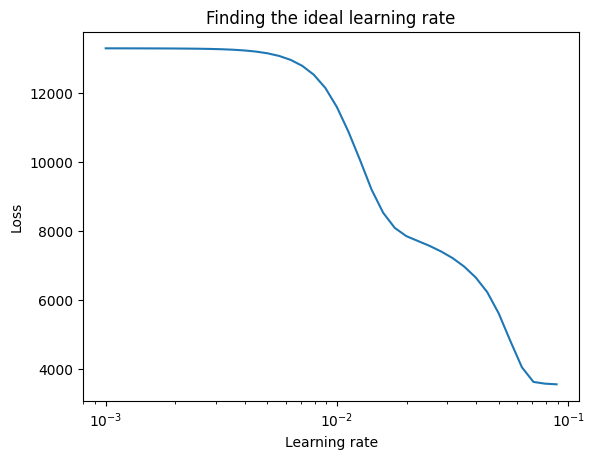

In [ ]:
# Step 3: Plot the Learning Rate decay curve to find the ideal Learning Rate
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history2_lr.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
#Step 4:Based on the diagram, looks like ideal learning rate is 10^-2, so use that when compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics='mae')
history2 = model.fit(X_train_normal, y_train, epochs=40, validation_data=(X_test_normal, y_test))
pd.DataFrame(history2.history).plot()

Epoch 1/40
34/34 [==============================] - 1s 13ms/step - loss: 3623.3936 - mae: 3623.3936 - val_loss: 3338.8376 - val_mae: 3338.8376
Epoch 2/40
34/34 [==============================] - 0s 5ms/step - loss: 3592.6597 - mae: 3592.6597 - val_loss: 3321.0999 - val_mae: 3321.0999
Epoch 3/40
34/34 [==============================] - 0s 4ms/step - loss: 3564.6501 - mae: 3564.6501 - val_loss: 3325.1313 - val_mae: 3325.1313
Epoch 4/40
34/34 [==============================] - 0s 3ms/step - loss: 3552.7668 - mae: 3552.7668 - val_loss: 3301.8806 - val_mae: 3301.8806
Epoch 5/40
34/34 [==============================] - 0s 3ms/step - loss: 3515.6763 - mae: 3515.6763 - val_loss: 3303.6440 - val_mae: 3303.6440
Epoch 6/40
34/34 [==============================] - 0s 3ms/step - loss: 3496.2202 - mae: 3496.2202 - val_loss: 3306.0144 - val_mae: 3306.0144
Epoch 7/40
34/34 [==============================] - 0s 4ms/step - loss: 3496.0903 - mae: 3496.0903 - val_loss: 3293.2214 - val_mae: 3293.2214
Epoch

##Regression - Array [Fahad]

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

def solution_model():
  xs = np.array([-1.0,0.0, 1.0,2.0,3.0,4.0])
  ys = np.array([-3.0,-1.0, 1.0,3.0,5.0,7.0])

  #Code here in exam
  tf.random.set_seed(42)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=[1])) #Output layer: Predicting one number, i.e. Price
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer=tf.keras.optimizers.SGD(), loss='mae', metrics='mae')

  model.fit(xs, ys, epochs=100)
  print(model.predict([10]))
  return model

model = solution_model()


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.3882 - mae: 2.3882
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 2.2904 - mae: 2.2904
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 2.1912 - mae: 2.1912
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 2.0905 - mae: 2.0905
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 1.9881 - mae: 1.9881
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 1.8840 - mae: 1.8840
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 1.7779 - mae: 1.7779
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 1.6697 - mae: 1.6697
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 1.5763 - mae: 1.5763
Epoch 10/100
1/1 [==============================] - 0s 30ms/step - loss: 1.5040 - mae: 1.5040
Epoch 11/100
1/1 [==============================] - 0s 36ms/step - loss

In [ ]:
if --name == "__main__":
  model = solution_model
  model.save('reg.h5')

## Binary Classification (for Text Input) - SKLearn Dataset
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb

In [ ]:
#Get circles dataset from SKlearn
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100)

#Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Build Sequential model for Binary Classification
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(units=316, activation='relu'))
model3.add(tf.keras.layers.Dense(units=264, activation='relu'))
model3.add(tf.keras.layers.Dense(units=128, activation='relu'))
model3.add(tf.keras.layers.Dense(units=64, activation='relu'))
model3.add(tf.keras.layers.Dense(units=32, activation='relu'))
model3.add(tf.keras.layers.Dense(units=16, activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.5))   #add Dropout layer
model3.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Output layer: sigmoid for binary class
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=40, callbacks=[callback_earlystop, MC], validation_data=(X_test, y_test))

#Evaluate and Plot the history
pd.DataFrame(history3.history).plot()

#Predict results
y_prob = model3.predict(X_test)  #Classication problems return probability
y_pred = tf.round(y_prob)

#Evaluate results
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Epoch 1/40
3/3 [==============================] - 1s 82ms/step - loss: 0.6911 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/40
3/3 [==============================] - 0s 13ms/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/40
3/3 [==============================] - 0s 13ms/step - loss: 0.6900 - accuracy: 0.4875 - val_loss: 0.6959 - val_accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/40
3/3 [==============================] - 0s 13ms/step - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.6967 - val_accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/40
3/3 [==============================] - 0s 15ms/step - loss: 0.6891 - accuracy: 0.5125 - val_loss: 0.6976 - val_accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/40
3/3 [==============================] - 0s 13ms/step - loss: 0.6886 - accuracy: 0.5000 - val_loss: 0.6987 - val_accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/40
3/3 [==============================] - 0s 13ms/step -

In [ ]:
#Save a model
path = 'Model3.h5' #.h5 or .keras
model3.save(filepath=path)

#Load the saved model
model3 = tf.keras.models.load_model(filepath=path)
model3.evaluate(X_test, y_test)

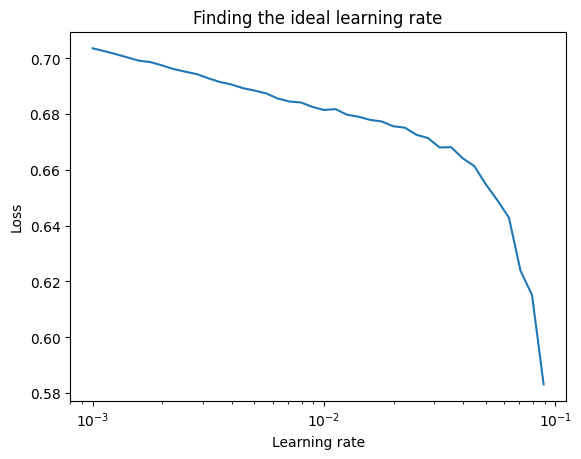

In [ ]:
# Step 3: Plot the Learning Rate decay curve to find the ideal Learning Rate
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history3.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

#Predict results
y_prob = model3.predict(X_test)  #Classication problems return probability
y_pred = tf.round(y_prob)

#Evaluate results
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Epoch 1/40
3/3 [==============================] - 1s 87ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 2/40
3/3 [==============================] - 0s 13ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 3/40
3/3 [==============================] - 0s 19ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 4/40
3/3 [==============================] - 0s 16ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 5/40
3/3 [==============================] - 0s 30ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 6/40
3/3 [==============================] - 0s 26ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 7/40
3/3 [==============================] - 0s 14ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 8/40
3/3 [===========

1/1 [==============================] - 0s 61ms/step


## Multi-class Categorization [ Images as Tensors (28x28) ] - Tensorflow Dataset (MNIST)
https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb#scrollTo=2WLKnUi6fI6B

In [ ]:
# Import dataset from tensorflow (its already in Tensor format)
# The data has already been sorted into training and test sets
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(f'X_train{X_train.shape} y_train{y_train.shape} ;  X_test{X_test.shape} y_test{y_test.shape}')

4422102/4422102 [==============================] - 0s 0us/step
X_train(60000, 28, 28) y_train(60000,) ;  X_test(10000, 28, 28) y_test(10000,)


Ankle boot


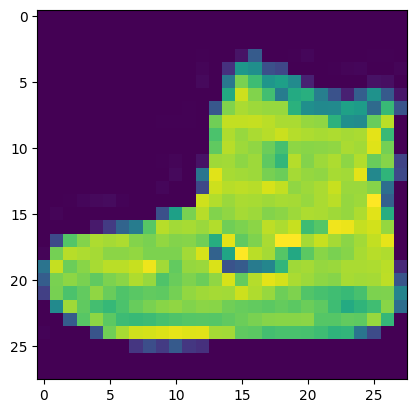

In [ ]:
#Paint/see an image (currently images are in tensors) and its label
import matplotlib.pyplot as plt
plt.imshow(X_train[0])     #since image is already in tensor, just need to plot it using matplotlib.pyplot

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[0]])

In [ ]:
#Scalling (Manual) - Convert each tensor value between 0 and 1

min = float(X_train[0].min()) #check  min value of a tensor  =>0
max = float(X_train[0].max())  #check max value of a tensor =>255

X_train = X_train/max #Divide by the max value, so each value is between 0 and 1
X_test = X_test/max

In [ ]:
#Build a sequential model (Input shape: 28x28; shape of output layer: 10 (10 classes/lables))
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Flatten(input_shape=(28,28))) #Input Layer: Reshape 28x28 to 784 using the Flatten layer
model4.add(tf.keras.layers.Dense(units=264, activation='relu'))
model4.add(tf.keras.layers.Dense(units=128, activation='relu'))
model4.add(tf.keras.layers.Dense(units=64, activation='relu'))
model4.add(tf.keras.layers.Dense(units=32, activation='relu'))
model4.add(tf.keras.layers.Dense(units=len(set(y_train)), activation='softmax')) #count the unique values of y / number of unique classes
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')
history4 = model4.fit(X_train, y_train, callbacks=[callback_earlystop, MC], validation_data=(X_test, y_test), epochs=10)

#Evaluate and Plot the history
pd.DataFrame(history4.history).plot()

Epoch 1/2
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1123 - accuracy: 0.5870 - val_loss: 0.7583 - val_accuracy: 0.7249
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6882 - accuracy: 0.7553 - val_loss: 0.6539 - val_accuracy: 0.7702


In [ ]:
#Predict and evaluate
y_prob = model4.predict(X_test) #Returns 10 numbers, one probability for each class/label
y_pred = y_prob.argmax(axis=1)  #So need to convert the 10 probabalities to a single classes/labels

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cr)

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.88      0.94      0.91      1000
           2       0.56      0.79      0.66      1000
           3       0.82      0.75      0.78      1000
           4       0.60      0.56      0.58      1000
           5       0.93      0.87      0.90      1000
           6       0.43      0.27      0.33      1000
           7       0.91      0.89      0.90      1000
           8       0.95      0.91      0.93      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.76     10000
weighted avg       0.77      0.77      0.76     10000



##Multi-class Categorization - [Images as Tensors (32x32x3) - Tensorflow Datasets (CIFAR)

In [ ]:
#Load the CIFAR images dataset from TF Datasets
# The data has already been sorted into training and test sets
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
print(f'X_train{X_train.shape} y_train{y_train.shape} ;  X_test{X_test.shape} y_test{y_test.shape}')

170498071/170498071 [==============================] - 4s 0us/step
X_train(50000, 32, 32, 3) y_train(50000, 1) ;  X_test(10000, 32, 32, 3) y_test(10000, 1)


The unique values of classes are [0 1 2 3 4 5 6 7 8 9]


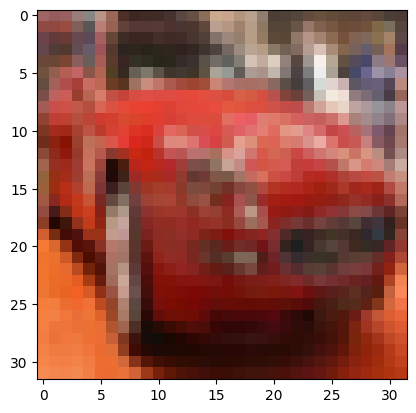

In [ ]:
#Draw some images
import matplotlib.pyplot as plt
import numpy as np
class_count = len(np.unique(y_train))
print(f'The unique values of classes are {np.unique(y_train)}')
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(X_train[5])  #since image is already in tensor, just need to plot it using matplotlib.pyplo

In [ ]:
#Scale the values (All pixel values to be between 0 and 1)
max = float(X_train[0].max())  #find the maximimum value of pixels
min = float(X_train[0].min())

X_train = X_train / max
X_test = X_test / max

In [ ]:
from gc import callbacks
#Build a sinple Dense Model, using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=class_count, activation='softmax'))  #10 classes; multi-class classification
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=40, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

Epoch 1/40
1563/1563 [==============================] - 20s 12ms/step - loss: 1.9056 - accuracy: 0.3163 - val_loss: 1.7795 - val_accuracy: 0.3650 - lr: 1.0000e-04
Epoch 2/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7417 - accuracy: 0.3816 - val_loss: 1.6967 - val_accuracy: 0.3915 - lr: 1.1220e-04
Epoch 3/40
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6706 - accuracy: 0.4091 - val_loss: 1.6711 - val_accuracy: 0.4082 - lr: 1.2589e-04
Epoch 4/40
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6260 - accuracy: 0.4262 - val_loss: 1.6118 - val_accuracy: 0.4308 - lr: 1.4125e-04
Epoch 5/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5880 - accuracy: 0.4420 - val_loss: 1.5889 - val_accuracy: 0.4425 - lr: 1.5849e-04
Epoch 6/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5597 - accuracy: 0.4481 - val_loss: 1.5680 - val_accuracy: 0.4509 - lr: 1.7783e-04
Epoch 7/40
1563/1563 [=====

[1.7729272842407227, 0.3594000041484833]

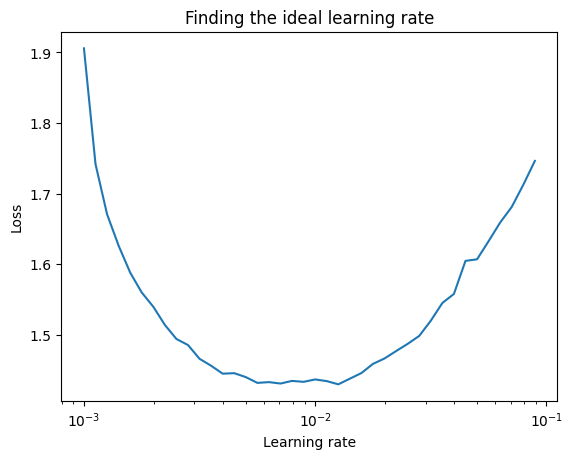

In [ ]:
# Step 3: Plot the Learning Rate decay curve to find the ideal Learning Rate
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
#Run the model with the optimial Learning Rate for Adam (based on above graph)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))  #10 classes; multi-class classification
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=40, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)

Epoch 1/40
1563/1563 [==============================] - 12s 7ms/step - loss: 2.0316 - accuracy: 0.2588 - val_loss: 1.9143 - val_accuracy: 0.2760
Epoch 2/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9188 - accuracy: 0.2866 - val_loss: 1.9265 - val_accuracy: 0.2863
Epoch 3/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9118 - accuracy: 0.2912 - val_loss: 1.9206 - val_accuracy: 0.2854
Epoch 4/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8915 - accuracy: 0.3000 - val_loss: 1.9265 - val_accuracy: 0.3209
Epoch 5/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8915 - accuracy: 0.2957 - val_loss: 1.8844 - val_accuracy: 0.3164
Epoch 6/40
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8744 - accuracy: 0.3036 - val_loss: 1.8339 - val_accuracy: 0.3216
Epoch 7/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8689 - accuracy: 0.3052 - val_loss: 1.8580 - val_acc

[1.9498146772384644, 0.2475000023841858]

In [ ]:
#Predict and evaluate
y_pred = tf.argmax(model.predict(X_test), axis=1) #convert 10 probability into 1 predcition
print(f'Actual:{tf.squeeze(y_test[1])} ; Predicated {y_pred[1]}')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'accuracy {acc}')
print(cr)
print(cm)

313/313 [==============================] - 2s 5ms/step
(10000, 1) (10000,)
Actual:8 ; Predicated 1
accuracy 0.3979
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1000
           1       0.45      0.59      0.51      1000
           2       0.28      0.36      0.31      1000
           3       0.25      0.35      0.29      1000
           4       0.41      0.22      0.29      1000
           5       0.31      0.38      0.34      1000
           6       0.51      0.21      0.30      1000
           7       0.45      0.51      0.48      1000
           8       0.47      0.60      0.52      1000
           9       0.61      0.27      0.37      1000

    accuracy                           0.40     10000
   macro avg       0.42      0.40      0.39     10000
weighted avg       0.42      0.40      0.39     10000

[[487  64  88  63   8  25   9  53 191  12]
 [ 60 593  22  64  12  46   9  35  99  60]
 [ 97  44 357 115  77 131  44  84  46   

#Image classification

## CNN (Conv2D) for Images (Binary Classification)

In [ ]:
#Get images from web and Unzip the downloaded file
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-02 14:22:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.207, 142.250.128.207, 172.253.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   149MB/s    in 0.7s    

2023-12-02 14:22:55 (149 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Walk through pizza_steak directory and list number of files
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
#Get the class/label names programmatically
import pathlib
import numpy as np
str_path = 'pizza_steak/train/'
data_dir = pathlib.Path(str_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


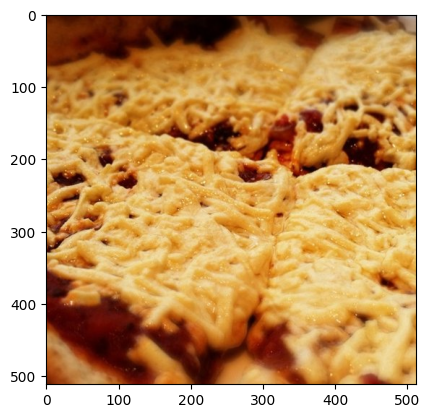

In [ ]:
#View the images (only to visualize)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

str_img_path = f'{str_path}pizza/1008144.jpg' #path of an image file
img_tensor = mpimg.imread(str_img_path) #Load image as a tensor
print(img_tensor) #prints shape of the tensor
plt.imshow(img_tensor)  #plot the tensor as an image

In [ ]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Scale and augment images
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                   shear_range=0.2, # shear the image
                                   zoom_range=0.2, # zoom into the image
                                   width_shift_range=0.2, # shift the image width ways
                                   height_shift_range=0.2, # shift the image height ways
                                   horizontal_flip=True) # flip the image on the horizontal axis
test_datagen = ImageDataGenerator(rescale=1./255)

#Load image dataSet as Tensors
train_dataset = train_datagen.flow_from_directory(directory=train_dir, class_mode='binary', target_size=(224,224), batch_size=32, shuffle=True) # resize the images as 224x224 (height x widht)
test_dataset = test_datagen.flow_from_directory(directory=test_dir, class_mode='binary', target_size=(224,224), batch_size=32) # height x width

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Build the CNN Model
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3), activation='relu')) #resize the images as 224x224x3 (width, height, color channel)
model5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model5.add(tf.keras.layers.MaxPool2D(pool_size=2))
model5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model5.add(tf.keras.layers.MaxPool2D(pool_size=2))
model5.add(tf.keras.layers.Flatten()) #Dense layer expects 1-dimensional Tensor as input, hence need to Flatten
model5.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Output layer
model5.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history5 = model5.fit(train_dataset)

47/47 [==============================] - 153s 3s/step - loss: 0.6494 - accuracy: 0.6067


In [ ]:
#Make predictions and Evaluate results

#download the images form the web
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
filename1 = '03-steak.jpeg'
filename2 = '03-pizza-dad.jpeg'

#view the image
img_tensor1 = mpimg.imread(filename1)  # Load an actual image as Tensor
#plt.imshow(img_tensor1) # plot the image

# Read in target file (an image)
img = tf.io.read_file(filename1)

# Decode the read file into a tensor & ensure 3 colour channels
# (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
img = tf.image.decode_image(img, channels=3)

# Resize the image (to the same size our model was trained on: 224x224 => heightxwidth)
img = tf.image.resize(img, size = [224, 224])

# Rescale the image (get all pixel values between 0 and 1)
img = img/255.

y_prob = model5.predict(tf.expand_dims(img, axis=0))  #1x224x224x3 (batch size x width x height x color)
y_pred = int(tf.round(y_prob))
print(class_names[y_pred])

--2023-12-02 16:12:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.4’

03-steak.jpeg.4     100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2023-12-02 16:12:34 (24.6 MB/s) - ‘03-steak.jpeg.4’ saved [1978213/1978213]

--2023-12-02 16:12:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respons

## Simple Sequential Model for Images (Binary Classification)

In [ ]:
#Simple Dense Model (using the preprocessed images from above section)
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))  #Dense layers expects 1-D tensor, hence needs to Flatten
model6.add(tf.keras.layers.Dense(units=4, activation='relu'))
model6.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  #output layer
model6.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history6 = model6.fit(train_dataset)

47/47 [==============================] - 4s 74ms/step - loss: 0.7148 - accuracy: 0.5147


## Multi-Class Classification (for Images)

In [ ]:
#Import the images from the web
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zipref = zipfile.ZipFile('10_food_classes_all_data.zip')
zipref.extractall()
zipref.close()

--2023-12-02 21:25:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.207, 74.125.201.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  88.9MB/s    in 4.2s    

2023-12-02 21:25:41 (118 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



NameError: ignored

In [ ]:
import os
for dirpath, dirnames, filnames in os.walk('10_food_classes_all_data'):
  print(f'{filnames} file under {dirnames} under root {dirpath}')

[] file under ['train', 'test'] under root 10_food_classes_all_data
[] file under ['chicken_curry', 'ice_cream', 'ramen', 'grilled_salmon', 'sushi', 'steak', 'chicken_wings', 'hamburger', 'pizza', 'fried_rice'] under root 10_food_classes_all_data/train
['2460096.jpg', '3014233.jpg', '2241984.jpg', '3181412.jpg', '3831847.jpg', '354677.jpg', '2711768.jpg', '799892.jpg', '1372178.jpg', '844686.jpg', '36340.jpg', '737216.jpg', '3494614.jpg', '3421060.jpg', '1953012.jpg', '2890083.jpg', '739513.jpg', '3104424.jpg', '3370105.jpg', '931003.jpg', '667414.jpg', '2041317.jpg', '752586.jpg', '1402222.jpg', '2669371.jpg', '2094760.jpg', '3061568.jpg', '762359.jpg', '3830277.jpg', '2960843.jpg', '3071510.jpg', '1477067.jpg', '2658451.jpg', '1027623.jpg', '2000064.jpg', '1829512.jpg', '937459.jpg', '3307194.jpg', '3195451.jpg', '3219281.jpg', '3570420.jpg', '3638377.jpg', '102896.jpg', '460508.jpg', '2282195.jpg', '1173563.jpg', '16107.jpg', '1750242.jpg', '606312.jpg', '1330735.jpg', '3198121.jpg'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#view some sample images
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
img_path = f'{train_dir}ramen/1002843.jpg'
img_tensor = mpimg.imread(img_path)
#plt.imshow(img_tensor)

In [ ]:
#Get the class/label names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
#Load and preprocess images (Scaling and Data Augmentation)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                   shear_range=0.2, # shear the image
                                   zoom_range=0.2, # zoom into the image
                                   width_shift_range=0.2, # shift the image width ways
                                   height_shift_range=0.2, # shift the image height ways
                                   horizontal_flip=True) # flip the image on the horizontal axis
test_datagen = ImageDataGenerator(rescale=1/.255)

train_dataset = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224),class_mode='categorical', shuffle=True, batch_size=32)
test_dataset = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode='categorical', batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#Build Conv2D Model
import tensorflow as tf
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3), activation='relu'))
model6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model6.add(tf.keras.layers.MaxPool2D(pool_size=2))
model6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model6.add(tf.keras.layers.MaxPool2D(pool_size=2))
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model6.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model6.fit(train_dataset)

152/235 [==================>...........] - ETA: 4:45 - loss: 2.2639 - accuracy: 0.1622

KeyboardInterrupt: ignored

In [ ]:
#Predict and evaluate
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
filename1 = '03-pizza-dad.jpeg'
filename2 = '03-steak.jpeg'
filename3 = '03-hamburger.jpeg'

# Read in target file (an image)
img = tf.io.read_file(filename2)

# Decode the read file into a tensor & ensure 3 colour channels
# (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
img = tf.image.decode_image(img, channels=3)

# Resize the image (to the same size our model was trained on: 224x224 => heightxwidth)
img = tf.image.resize(img, size = [224, 224])

# Rescale the image (get all pixel values between 0 and 1)
img = img/255.

#plt.imshow(img)

y_probs = model6.predict(tf.expand_dims(img, axis=0))
print(y_probs)
y_pred = tf.argmax(y_probs[0])
print(y_pred)

1/1 [==============================] - 0s 37ms/step
[[0.07724334 0.05436768 0.13274059 0.1399714  0.11221766 0.08962786
  0.06786569 0.11297476 0.12035027 0.09264066]]
tf.Tensor(3, shape=(), dtype=int64)


#Transfer Learning

## Feature Extraction on Images (Multi Class Classification) - ResNet

In [ ]:
# Download data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-03 15:26:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   214MB/s    in 0.8s    

2023-12-03 15:26:02 (214 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# How many images in each folder?
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [ ]:
#Preprocess Images (Scale and Data Augment)
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                   shear_range=0.2, # shear the image
                                   zoom_range=0.2, # zoom into the image
                                   width_shift_range=0.2, # shift the image width ways
                                   height_shift_range=0.2, # shift the image height ways
                                   horizontal_flip=True) # flip the image on the horizontal axis
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224), class_mode='categorical', batch_size=32, shuffle=True)
test_dataset = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode='categorical', batch_size=32)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#Get the class/label names programmatically
import pathlib
import numpy as np
str_path = '10_food_classes_10_percent/train/'
data_dir = pathlib.Path(str_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Resnet50 V2 Feature vector
import tensorflow as tf
import tensorflow_hub as hub
resnet_url = "https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/classification/versions/1"

feature_extractor_layer = hub.KerasLayer(resnet_url, trainable=False, input_shape=(224,224,3))
model7 = tf.keras.Sequential()
model7.add(feature_extractor_layer)
model7.add(tf.keras.layers.Dense(units=10, activation='softmax'))   #Output layer (10 classes)
model7.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.categorical_crossentropy, metrics='accuracy')
history7 = model7.fit(train_dataset)

24/24 [==============================] - 184s 7s/step - loss: 2.2945 - accuracy: 0.1853


In [ ]:
model7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              25612201  
                                                                 
 dense_2 (Dense)             (None, 10)                10020     
                                                                 
Total params: 25622221 (97.74 MB)
Trainable params: 10020 (39.14 KB)
Non-trainable params: 25612201 (97.70 MB)
_________________________________________________________________


##Feature Extraction on Images (Multi Class Classification) - EfficientNet

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pathlib

#Get the images zip file from web and store it locally (and unzip it)
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip'
data_dir = tf.keras.utils.get_file(origin=url, extract=True)
print(data_dir)
data_dir = pathlib.Path(data_dir).with_suffix('')
print(data_dir)

#Load files from local path into tensorflow datasets
train_path = 'C:\\Users\\EH839XW\\.keras\\datasets\\10_food_classes_10_percent\\train'
test_path = 'C:\\Users\\EH839XW\\.keras\\datasets\\10_food_classes_10_percent\\test'
train_ds = tf.keras.utils.image_dataset_from_directory(directory=train_path,validation_split=0.2, subset='training', seed=123, batch_size=32, image_size=(256,256))
test_ds = tf.keras.utils.image_dataset_from_directory(directory=test_path, validation_split=0.2, subset='validation', seed=123, batch_size=32, image_size=(256, 256))
class_names = train_ds.class_names
print(class_names)

#print the shape of the images and thier labels
for images, labels in train_ds:
    print(images.shape)
    print(labels.shape)
    break

#Augment the images (by creating an augmentation model, and then addints it as a layer)
#Data Augmentation (build as a sequential model)
data_aug = tf.keras.Sequential()
data_aug.add(tf.keras.layers.RandomFlip())
data_aug.add(tf.keras.layers.RandomRotation(0.2))
data_aug.add(tf.keras.layers.RandomZoom(0.1))
#Scale the augmented images (by adding a layer called Rescalling)

#Create an efficentNet or resnet model from tensorflow hub, and add it as layer to a Sequential model
resnet_url = "https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/classification/versions/1"
effnet_url = 'https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-classification/versions/1'

feature_extractor_layer = hub.KerasLayer(effnet_url,trainable=False,input_shape=(256,256,3))
model0 = tf.keras.Sequential()
model0.add(data_aug)
model0.add(tf.keras.layers.Rescaling(1./256))
model0.add(feature_extractor_layer)
model0.add(tf.keras.layers.Dense(units=len(class_names)))  #output layer
model0.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history0 = model0.fit(train_ds, validation_data=test_ds, epochs=10)

168546183/168546183 [==============================] - 3s 0us/step
/root/.keras/datasets/10_food_classes_10_percent.zip
/root/.keras/datasets/10_food_classes_10_percent


NotFoundError: ignored

##Fine Tuning on Images (Multi Class Classification) - Functional API: EfficientNet Model

In [ ]:
# Get 10% of the data of the 10 classes
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-03 19:29:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   145MB/s    in 1.1s    

2023-12-03 19:29:47 (145 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [ ]:
import os
path = '10_food_classes_10_percent'
for dirpath, dirnames, filenames in os.walk(path):
  print(f'{filenames} in {dirnames} directory, under roor {dirpath}')

[] in ['train', 'test'] directory, under roor 10_food_classes_10_percent
[] in ['chicken_curry', 'ice_cream', 'ramen', 'grilled_salmon', 'sushi', 'steak', 'chicken_wings', 'hamburger', 'pizza', 'fried_rice'] directory, under roor 10_food_classes_10_percent/train
['3014233.jpg', '3421060.jpg', '3370105.jpg', '2282195.jpg', '1173563.jpg', '606312.jpg', '43038.jpg', '2394967.jpg', '677868.jpg', '3344165.jpg', '1515472.jpg', '1873303.jpg', '3233857.jpg', '2342039.jpg', '246145.jpg', '1623603.jpg', '302482.jpg', '1467698.jpg', '2914285.jpg', '1918883.jpg', '3757107.jpg', '2208444.jpg', '3601368.jpg', '811637.jpg', '1651201.jpg', '2038187.jpg', '504931.jpg', '2681181.jpg', '2973786.jpg', '2621177.jpg', '1371322.jpg', '116147.jpg', '2049685.jpg', '876.jpg', '2810053.jpg', '128873.jpg', '2234972.jpg', '718906.jpg', '609136.jpg', '1451183.jpg', '2798660.jpg', '1071242.jpg', '1856555.jpg', '2087169.jpg', '1878636.jpg', '3679216.jpg', '2191925.jpg', '3808493.jpg', '3071734.jpg', '3633664.jpg', '3

In [ ]:
#Load and preprocess images (scaling and data augmentaion)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = f'{path}/train'
test_dir = f'{path}/test'

#Scale and augment images
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                   shear_range=0.2, # shear the image
                                   zoom_range=0.2, # zoom into the image
                                   width_shift_range=0.2, # shift the image width ways
                                   height_shift_range=0.2, # shift the image height ways
                                   horizontal_flip=True) # flip the image on the horizontal axis

test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224), class_mode='categorical')
test_dataset = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode='categorical' )

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#Create Model using TF Functional API: Create EffincentNet as base model, pass input layer via base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
input = tf.keras.layers.Input(shape=(224,224,3))
x = base_model(input)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(units=10, activation='softmax')(x)
model8 = tf.keras.Model(input, output)

 1/24 [>.............................] - ETA: 5:08 - loss: 0.6923 - accuracy: 0.1875

KeyboardInterrupt: ignored

In [ ]:
#Now fine tune the base model i.e. make its last few (5) layers trainable

#count total layers
total_layers = 0
for layer in base_model.layers:
  total_layers = total_layers +1
print(total_layers)

#make the last 5 layers trianable
count_layers = 0
for layer in base_model.layers:
  if count_layers > total_layers - 5:
    layer.trainable = True
  #print(f'{layer.name} {layer.trainable}')
  count_layers = count_layers +1

270
input_5 False
rescaling_2 False
normalization_2 False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv False
block3a_expand_bn False
block3a_expand_activation False
block3a_project_conv False
block3a_project_bn False
block3b_expand_conv False
block3b_expand_bn False
block3b_expand_activation False
block3b_project_conv False
block3b_project_bn False
block3b_drop False
block3b_add False
block4a_expand_conv False
block4a_expand_bn False
block4a_expand_activation False
block4a_dwconv2 False
block4a_bn False
block4a_activation False
block4a_se_squeeze False
block4a_se_reshape False

In [ ]:
model8.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
model8.fit(train_dataset, epochs=2)

Epoch 1/2
24/24 [==============================] - 67s 2s/step - loss: 0.4583 - accuracy: 0.0960
Epoch 2/2
24/24 [==============================] - 52s 2s/step - loss: 0.3610 - accuracy: 0.1013


In [ ]:
#predict and evaluate results
y_probs = model8.predict(test_dataset)
y_pred = y_probs.argmax(axis=1)
y_pred[:10]

79/79 [==============================] - 178s 2s/step


In [ ]:
#Get the labels/classes of the test dataset
y_test = test_dataset.classes
y_test[:10]
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f'{cr}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.10      0.93      0.18       250
           2       0.06      0.01      0.02       250
           3       0.15      0.03      0.05       250
           4       0.00      0.00      0.00       250
           5       0.12      0.00      0.01       250
           6       0.10      0.00      0.01       250
           7       0.00      0.00      0.00       250
           8       0.06      0.00      0.01       250
           9       0.00      0.00      0.00       250

    accuracy                           0.10      2500
   macro avg       0.06      0.10      0.03      2500
weighted avg       0.06      0.10      0.03      2500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#NLP

## Preprocess Data: Text Vectorization and Embedding (Texts & Classes in same CSV file)

In [ ]:
# Download data (same as from Kaggle)
import zipfile
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
zipref = zipfile.ZipFile('nlp_getting_started.zip')
zipref.extractall()
zipref.close()

--2024-02-04 16:42:33--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2024-02-04 16:42:33 (79.6 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
#Read from csv and create X and y, and split into train and test datasets
import pandas as pd
train_df = pd.read_csv('train.csv')
X = train_df['text'].to_numpy()
y = train_df['target'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
len(X_train), len(y_train), len(X_test), len(y_test)

(6090, 6090, 1523, 1523)

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
#Build Text Vectorization Layer: Convert words into numbers/tokens  (1:1 => word:token)
import tensorflow as tf
import random

#Find average number of tokens (words) in training Tweets
max_length = round(sum([len(i.split()) for i in X_train])/len(X_train))

#Build and Fit Text vectorizatoin layer
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=max_length, output_mode='int')
text_vectorizer.adapt(X_train)

#JUST TO TEST: Get a random sentence and tokenize it
random_sentence = random.choice(X_train)
text_vectorizer([random_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   8,  992,    4,  267, 2194,    1,   63,    6,    2,  298, 3848,
          41, 7146,   56,  992]])>

In [ ]:
#Build Embedding Layer: Convert a token into learnable vectors (1:many => token:embeddings)
embedding = tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=max_length)

#JUST TO TEST: Get a random tokenzied sentence and embed it
embedding(text_vectorizer(random_sentence))

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.03592054, -0.00343962,  0.03730509, ...,  0.02487512,
        -0.02419316, -0.03507631],
       [-0.03295995,  0.01369187,  0.00268185, ...,  0.03381557,
        -0.03170604, -0.02110304],
       [-0.02806014,  0.04135027, -0.0301572 , ...,  0.03628137,
         0.03849479,  0.04112705],
       ...,
       [ 0.03834827,  0.03058262,  0.01585742, ...,  0.01693877,
        -0.04333398, -0.0122725 ],
       [ 0.04002819,  0.01368136, -0.0078523 , ...,  0.00365306,
        -0.02594578, -0.01188607],
       [-0.03295995,  0.01369187,  0.00268185, ...,  0.03381557,
        -0.03170604, -0.02110304]], dtype=float32)>

## Dense Model (Binary Classification) - Functional API

In [ ]:
#Build a simple Dense Model using Functional API for Binary Classification
input = tf.keras.layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(input)  #conver text into thier respective tokens/numbers
x = embedding(x)   #create an embedding of the numerized numbers
x = tf.keras.layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x) #unit=1, since binary classificaiton
model10 = tf.keras.Model(input, output)
model10.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history10 = model10.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)
model10.summary()

191/191 [==============================] - 5s 21ms/step - loss: 0.6220 - accuracy: 0.6849 - val_loss: 0.5471 - val_accuracy: 0.7498
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129   

In [ ]:
model10.save('model_10', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotImplementedError: Save or restore weights that is not an instance of `tf.Variable` is not supported in h5, use `save_format='tf'` instead. Received a model or layer TextVectorization with weights [<keras.src.layers.preprocessing.index_lookup.VocabWeightHandler object at 0x7a9c4954e5c0>]

In [ ]:
model10.export('/model10.h5')

Saved artifact at '/model10.h5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.string, name='input_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134811649691840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134811649702752: TensorSpec(shape=(), dtype=tf.int64, name=None)
  134811663904688: TensorSpec(shape=(), dtype=tf.string, name=None)
  134811663905040: TensorSpec(shape=(), dtype=tf.int64, name=None)
  134812283769200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134811649241712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134811649235024: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import tensorflow as tf

# Convert the weights of the TextVectorization layer to tf.Variable objects
model10.get_layer("text_vectorization").set_weights(
    [tf.Variable(weight) for weight in model10.get_layer("text_vectorization").get_weights()]
)

# Save the model in the h5 format
model10.save("model10.h5", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotImplementedError: Save or restore weights that is not an instance of `tf.Variable` is not supported in h5, use `save_format='tf'` instead. Received a model or layer TextVectorization with weights [<keras.src.layers.preprocessing.index_lookup.VocabWeightHandler object at 0x7a9c4954e5c0>]

In [ ]:
#Make predictions and evaluate model
y_pred = tf.squeeze(tf.round(model10.predict(X_test)))
y_pred[:10]

from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy:{acc}; f1 score:{f1}')

48/48 [==============================] - 0s 4ms/step
accuracy:0.767564018384767; f1 score:0.6889279437609842


## LSTM (RNN) Model

In [ ]:
#Build and compile an LSTM (RNN) Model using the functional API
input = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(input)  #conver text into thier respective tokens/numbers
x = embedding(x)   #create an embedding of the numerized numbers
# x = tf.keras.layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = tf.keras.layers.LSTM(units=64)(x)
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)
model11 = tf.keras.Model(input, output)
model11.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history11 = model11.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)

Epoch 1/2
191/191 [==============================] - 13s 43ms/step - loss: 0.3445 - accuracy: 0.8588 - val_loss: 0.5106 - val_accuracy: 0.7741
Epoch 2/2
191/191 [==============================] - 6s 33ms/step - loss: 0.2424 - accuracy: 0.9076 - val_loss: 0.5783 - val_accuracy: 0.7623


In [ ]:
#Make predictions and evaluate model
y_pred = tf.squeeze(tf.round(model11.predict(X_test)))
y_pred[:10]

from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy:{acc}; f1 score:{f1}')

48/48 [==============================] - 2s 9ms/step
accuracy:0.7623112278397899; f1 score:0.7052117263843649


##GRU (RNN) Model

In [ ]:
#Build and compile a GRU (RNN) Model using the functional API
import tensorflow as tf
input = tf.keras.layers.Input(shape=(1,), dtype=tf.string) #define input layer to accpet texts/strings
x = text_vectorizer(input) #Convert the text input into numerical tokens
x = embedding(x) #convert each numerical token into learnable embeddings
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = tf.keras.layers.GRU(units=64)(x)
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)
model12 = tf.keras.Model(input, output)
model12.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history12 = model12.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)

Epoch 1/2
191/191 [==============================] - 19s 72ms/step - loss: 0.5551 - accuracy: 0.7084 - val_loss: 0.4492 - val_accuracy: 0.7932
Epoch 2/2
191/191 [==============================] - 12s 64ms/step - loss: 0.3251 - accuracy: 0.8619 - val_loss: 0.4642 - val_accuracy: 0.7919


In [ ]:
#Make predictions and evaluate model
y_pred = tf.squeeze(tf.round(model12.predict(X_test)))
y_pred[:10]

from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy:{acc}; f1 score:{f1}')

48/48 [==============================] - 1s 10ms/step
accuracy:0.7918581746552856; f1 score:0.7505900865460269


##CNN (Conv1D) Model

In [ ]:
#Build a Conv1D functional API Model for binary Text Classification
input = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)
model13 = tf.keras.Model(input, output)
model13.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history13 = model13.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)

Epoch 1/2
191/191 [==============================] - 10s 37ms/step - loss: 0.3336 - accuracy: 0.8920 - val_loss: 0.5168 - val_accuracy: 0.7807
Epoch 2/2
191/191 [==============================] - 4s 21ms/step - loss: 0.1886 - accuracy: 0.9299 - val_loss: 0.6021 - val_accuracy: 0.7577


In [ ]:
#Predict and evaluate
y_pred = tf.squeeze(tf.round(model13.predict(X_test)))
y_pred[:10]

from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc, f1

48/48 [==============================] - 0s 9ms/step


(0.757715036112935, 0.715497301464919)

##Transfer Learning (Feature Extractor) for NLP

In [ ]:
#Use the prebuilt Universal Sentence Encoder (USE) as a layer in Sequnetial model
import tensorflow_hub as hub
USE_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'

#we can use this pre-trained USE encoding layer inplace of the Text vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer(USE_url, input_shape=[], dtype=tf.string, trainable=False)

#Create a sequential model and add the USE encoding layer
model14 = tf.keras.Sequential()
model14.add(sentence_encoder_layer)
model14.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model14.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
history14 = model14.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)


Epoch 1/2
191/191 [==============================] - 11s 37ms/step - loss: 0.6523 - accuracy: 0.7253 - val_loss: 0.6173 - val_accuracy: 0.7754
Epoch 2/2
191/191 [==============================] - 4s 19ms/step - loss: 0.5902 - accuracy: 0.7877 - val_loss: 0.5682 - val_accuracy: 0.7807


In [ ]:
#predict and evalualte
y_pred = tf.squeeze(tf.round(model14.predict(X_test)))
y_pred[:10]

from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy:{acc}; f1 score:{f1}')

48/48 [==============================] - 3s 47ms/step
accuracy:0.7806959947472094; f1 score:0.7340764331210192


#NLP - Example

##Read Data

In [ ]:
# Import Tokenizer and pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import numpy and pandas
import numpy as np
import pandas as pd

In [ ]:
#path = tf.keras.utils.get_file('reviews.csv', 'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
#print(path)
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2024-03-03 16:41:20--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 172.217.218.139, 172.217.218.102, 172.217.218.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.218.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2024-03-03 16:41:21--  https://drive.usercontent.google.com/download?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.18.132, 2a00:1450:4013:c18::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.18.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127831 (125K) [application/octet-stream]
Saving to: ‘/tmp/sentiment.csv’

/tmp/sentiment.csv  100%[===================>] 124.83K  --.-KB/s    in 0.001s  

2024-03-03 16:41:22 (88.

In [ ]:
# Read the csv file
df = pd.read_csv('/tmp/sentiment.csv')

# Review the first few entries in the dataset
df.head()
sentences = df['text'].tolist()
labels = df['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

##Tokenzie the Words (and sequence and Pad Tokens)

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Create Tokenizer : Tokenize the Text
# Optionally set the max number of words to tokenize.
# The out of vocabulary (OOV) token represents words that are not in the index.
# Call fit_on_text() on the tokenizer to generate unique numbers for each word
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

#Sequence the Tokens (and Pad them so all are in same length)
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(padded)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

[[ 26  68   7 ...   0   0   0]
 [ 20  90  76 ...   0   0   0]
 [ 19  13   2 ...   0   0   0]
 ...
 [  4  50 809 ...   0   0   0]
 [ 14  20  13 ...   0   0   0]
 [  4   1   5 ...   0   0   0]]


##Train a Basic Sentiment Model with Embeddings

In [ ]:
# Build a basic sentiment network
# Note the embedding layer is first,
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(padded, training_labels_final, epochs=1)
model.summary()

50/50 [==============================] - 6s 30ms/step - loss: 0.6912 - accuracy: 0.5229 - val_loss: 0.6987 - val_accuracy: 0.4110
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 9606      
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25613 (100.05 KB)
Trainable params: 25613 (100.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#save model
path = 'model_nlp1.h5' #.h5 or .keras
model.save(filepath=path)
loaded_model = tf.keras.models.load_model(filepath=path)
loaded_model.evaluate(testing_padded, testing_labels_final)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Time Series - Time step (Date)

##Download Data

In [ ]:
#Read the data and set the Date column as Index
import pandas as pd
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',parse_dates=['Date'], index_col=['Date'])
df.head()

#Break into X (timesteps) and y (prices)
timesteps = df.index.to_numpy()
prices = df['Closing Price (USD)'].to_numpy()

--2024-03-07 01:36:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-03-07 01:36:23 (11.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


##PreProcess Data (Create Windowed datasets of past data and predicted data)

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

# Create function to view NumPy arrays as windows
import numpy as np
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
#Create the Full Windows and Full Labels
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

# View the first 3 windows/labels (just to visualize)
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

# View the last 3 windows/labels (just to visualize)
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]
Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


##Break Windows into Training and Testing DataSets

In [ ]:
#Split into training and test datasets (Note: do NOT use the TrainTestSplit method)
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
print(f'train_windows:{len(train_windows)} test_windows:{len(test_windows)} train_labels:{len(train_labels)} len(test_labels):{len(test_labels)}')

#view the first 5 trianing windows and labels
print(train_windows[:5])
print(train_labels[:5])

train_windows:2224 test_windows:556 train_labels:2224 len(test_labels):556
[[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]
 [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]
 [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]
 [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116]
 [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966]]
[[123.033  ]
 [124.049  ]
 [125.96116]
 [125.27966]
 [125.9275 ]]


##Dense Model

In [ ]:
#Build a simple Dense model using Seqential API
import tensorflow as tf
model15 = tf.keras.Sequential()
model15.add(tf.keras.layers.Dense(units=128, activation='relu'))
model15.add(tf.keras.layers.Dense(units=HORIZON)) # No activation defaults to linear activation
model15.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])
history15 = model15.fit(x=train_windows, y=train_labels, epochs=10, validation_data=(test_windows, test_labels), callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath='checkpoint', save_best_only=True, verbose=0)])


NameError: name 'HORIZON' is not defined

In [ ]:
#Evaluate and Predict
model15.evaluate(test_windows, test_labels)

#Load the saved Model Checkpoint and evaluate on it (as it saves the best performing epoch)
model15 = tf.keras.models.load_model('checkpoint')
model15.evaluate(test_windows, test_labels)

y_pred = tf.squeeze(model15.predict(test_windows))

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae1 = mean_absolute_error(test_labels, y_pred)
mse1 = mean_squared_error(test_labels, y_pred)
print(f'mae: {mae1}; mse {mse1}')

NameError: ignored

##Conv1D Model

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
#Note: This code is just to test and visualize how the lambda layer will look lik
x = tf.constant(train_windows[0])
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
#Build the Conv1D model (using the Lambda layer)
#Conv1D layer in TensorFlow takes an input of: (batch_size, timesteps, input_dim)
model16 = tf.keras.Sequential()
model16.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)))   #resize the inputs to adjust for window size / Conv1D 3D input requirements
model16.add(tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"))
model16.add(tf.keras.layers.Dense(HORIZON))
model16.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae')
model16.fit(train_windows, train_labels, epochs=2, batch_size=128)

y_pred = model16.predict(test_windows)
y_pred[0]

18/18 [==============================] - 0s 2ms/step


array([[8123.307]], dtype=float32)

##LSTM (RNN)

In [ ]:
#LSTM layer takes a tensor with [batch, timesteps, feature] dimensions
model18 = tf.keras.Sequential()
model18.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)))
model18.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model18.add(tf.keras.layers.Dense(units=HORIZON))
model18.compile(optimizer='adam', loss='mae', metrics='mae')
model18.fit(train_windows, train_labels, epochs=2, validation_data=(test_windows, test_labels))

y_pred = model18.predict(test_windows)
y_pred[0]

18/18 [==============================] - 0s 4ms/step


array([9352.154], dtype=float32)

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
type(train_windows.shape)

tuple

In [ ]:
WINDOW_SIZE, HORIZON

(7, 1)

In [ ]:
_ = tf.expand_dims(train_windows, axis=-1)
_.shape

TensorShape([2224, 1, 7])

##LSTM RNN (without Lambda)

In [ ]:
#LSTM layer takes a tensor with [batch, timesteps, feature] dimensions
model18 = tf.keras.Sequential()
#model18.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)))
# model18.add(tf.keras.layers.Input())
model18.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model18.add(tf.keras.layers.Dense(units=HORIZON))
model18.compile(optimizer='adam', loss='mae', metrics='mae')
model18.fit(tf.expand_dims(train_windows, axis=-1), train_labels, epochs=2, validation_data=(test_windows, test_labels))

y_pred = model18.predict(test_windows)
y_pred[0]

Epoch 1/2
70/70 [==============================] - 7s 48ms/step - loss: 635.6673 - mae: 635.6673 - val_loss: 1196.5720 - val_mae: 1196.5720
Epoch 2/2
18/18 [==============================] - 0s 8ms/step


array([9157.424], dtype=float32)

##Multivariate Timeseries

In [ ]:
#Import data (Include only the Price column; Set the Date column as Index)
import pandas as pd
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
df1 = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=['Date'], index_col=['Date'])
df = pd.DataFrame(df1['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'price'})

--2024-02-02 21:38:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.3’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.08s   

2024-02-02 21:38:38 (2.21 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.3’ saved [178509/178509]



In [ ]:
df.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
#Add another feature (called block_rewards)
import numpy as np
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

block_reward_2_days = (block_reward_3_datetime - df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - df.index[0]).days
block_reward_2_days, block_reward_3_days

#Add one more column (feature) called block_reward and sets its value based on the Index (Date)
df['block_reward'] = None
df.iloc[:block_reward_2_days, -1] = block_reward_2
df.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
df.iloc[block_reward_3_days:, -1] = block_reward_4
df.head()

,price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
#Create Windowed datasets of the multivariate features (7 days of price[7 columns], and 1 column for block_rward)

# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

# Make a copy of the Bitcoin historical data with block reward feature
df_prices_windowed = df.copy()
df_prices_windowed.head()

# Add windowed columns (by shifting columns)
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
  df_prices_windowed[f'prices+{i+1}'] = df_prices_windowed['price'].shift(periods=i+1)
df_prices_windowed.head()

#Create X (7 day prices and 1 block reward) and y(price, for 8th day)
X = df_prices_windowed.dropna().drop("price", axis=1).astype(np.float32)
y = df_prices_windowed.dropna()["price"].astype(np.float32)
X

,block_reward,prices+1,prices+2,prices+3,prices+4,prices+5,prices+6,prices+7
Date,,,,,,,,
2013-10-08,25.00,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.00,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.00,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.00,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.00,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661
...,...,...,...,...,...,...,...,...
2021-05-14,6.25,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094,56583.851562
2021-05-15,6.25,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094
2021-05-16,6.25,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938


In [ ]:
y

Date
2013-10-08      123.032997
2013-10-09      124.049004
2013-10-10      125.961159
2013-10-11      125.279663
2013-10-12      125.927498
                  ...     
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: price, Length: 2780, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
#Build Dense Model (multivariate)
import tensorflow as tf
model19 = tf.keras.Sequential()
model19.add(tf.keras.layers.Dense(units=128, activation='relu'))
model19.add(tf.keras.layers.Dense(units=128, activation='relu'))
model19.add(tf.keras.layers.Dense(units=HORIZON))
model19.compile(optimizer='adam', loss='mae')
model19.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)

Epoch 1/2
70/70 [==============================] - 2s 12ms/step - loss: 382.9003 - val_loss: 768.5629
Epoch 2/2
70/70 [==============================] - 0s 5ms/step - loss: 145.2315 - val_loss: 972.3232


In [ ]:
#Predict and Evaluate
y_pred = model19.predict(X_test)
y_pred[0]

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
print(f'mae:{mae1}, mse:{mse1}')

#MISC Items

##Save & Load Model; Checkpoint Callback

In [ ]:
#Create a Model
import tensorflow as tf
import numpy as np

#Create ModelCheckpoint callback (This callback will save the best model)
MC = tf.keras.callbacks.ModelCheckpoint('\modelcheckpoint', monitor='val_loss', save_best_only='True',verbose=1)

#Populate X and y
X_train = tf.constant(np.arange(10,15,1))
y_train = tf.constant(np.arange(100,150,10))
X_test = tf.constant([1,2,3])
y_test = tf.constant([110,120,130])

#Create a simple dense model
model_test = tf.keras.Sequential()
model_test.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_test.add(tf.keras.layers.Dense(units=32, activation='relu'))
model_test.add(tf.keras.layers.Dense(units=1))
model_test.compile(optimizer='adam', loss='mae')
model_test.fit(tf.expand_dims(X_train,axis=1),y_train, callbacks=[MC])

#Save a model
path = 'Model2.h5' #.h5 or .keras
model_test.save(filepath=path)

#Load the saved model
model_test = tf.keras.models.load_model(filepath=path)
model_test.evaluate(X_test, y_test)

# Download the model (or any file) from Google Colab to your local machine
from google.colab import files
files.download(path)

1/1 [==============================] - ETA: 0s - loss: 122.3913

1/1 [==============================] - 0s 104ms/step - loss: 120.2979


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Dropout layer to reduce Overfitting

In [ ]:
#Create a Model
import tensorflow as tf
import numpy as np

#Populate X and y
X_train = tf.constant(np.arange(10,15,1))
y_train = tf.constant(np.arange(100,150,10))
X_test = tf.constant([1,2,3])
y_test = tf.constant([110,120,130])

#Create a simple dense model (and add Dropout layers)
model_test = tf.keras.Sequential()
model_test.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_test.add(tf.keras.layers.Dropout(rate=0.5))   #add Dropout layer
model_test.add(tf.keras.layers.Dense(units=32, activation='relu'))
model_test.add(tf.keras.layers.Dropout(rate=0.5))   #add Dropout layer
model_test.add(tf.keras.layers.Dense(units=1))
model_test.compile(optimizer='adam', loss='mae')
history = model_test.fit(tf.expand_dims(X_train,axis=1),y_train, epochs=5, validation_data=(X_test, y_test))
model_test.summary()    #Notice  Params of the Dropout layers are 0

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 120.1297 - val_loss: 120.0177
Epoch 2/5
1/1 [==============================] - 0s 136ms/step - loss: 119.5761 - val_loss: 119.9713
Epoch 3/5
1/1 [==============================] - 0s 80ms/step - loss: 120.4452 - val_loss: 119.9138
Epoch 4/5
1/1 [==============================] - 0s 67ms/step - loss: 119.7012 - val_loss: 119.8527
Epoch 5/5
1/1 [==============================] - 0s 99ms/step - loss: 120.2694 - val_loss: 119.7906
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 128)               256       
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 32)                4128      
                

##Plot Loss and Accuracy

         loss         mae           mse    val_loss     val_mae       val_mse
0  119.995262  119.995262  14570.958008  119.918236  119.918236  14446.570312
1  119.757263  119.757263  14504.617188  119.855827  119.855827  14431.254883


<Axes: >

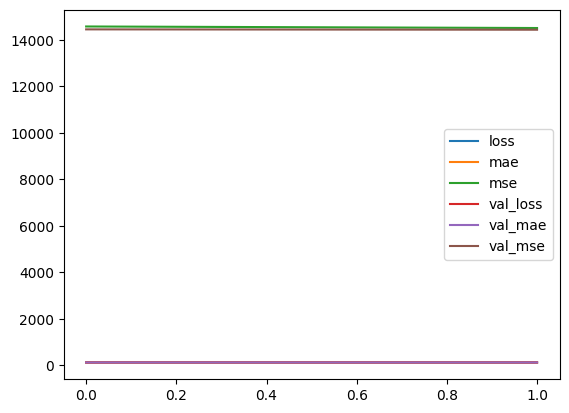

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Populate X and y
X_train = tf.constant(np.arange(10,15,1))
y_train = tf.constant(np.arange(100,150,10))
X_test = tf.constant([1,2,3])
y_test = tf.constant([110,120,130])

#Create a simple dense model (and add Dropout layers)
model_test = tf.keras.Sequential()
model_test.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_test.add(tf.keras.layers.Dropout(rate=0.5))   #add Dropout layer
model_test.add(tf.keras.layers.Dense(units=32, activation='relu'))
model_test.add(tf.keras.layers.Dropout(rate=0.5))   #add Dropout layer
model_test.add(tf.keras.layers.Dense(units=1))
model_test.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])
history = model_test.fit(tf.expand_dims(X_train,axis=1),y_train, epochs=2,validation_data=(X_test, y_test), verbose=0)

#For regression problem, metrics is mae or mse; for classification problem, metrics is accuracy
dict1 = history.history #returns a dictonary
print(pd.DataFrame(dict1))
pd.DataFrame(dict1).plot()

##Early Stopping Callback

In [ ]:
#Create a Model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Callback to trigger the end of training cycles
#This callback will stop  training when there is no improvement for 3 consecutive epochs
callback_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights='True')

#Populate X and y
X_train = tf.constant(np.arange(10,15,1))
y_train = tf.constant(np.arange(100,150,10))
X_test = tf.constant([1,2,3])
y_test = tf.constant([110,120,130])

#Create a simple dense model (and add Dropout layers)
model_test = tf.keras.Sequential()
model_test.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_test.add(tf.keras.layers.Dropout(rate=0.5))   #add Dropout layer
model_test.add(tf.keras.layers.Dense(units=32, activation='relu'))
model_test.add(tf.keras.layers.Dropout(rate=0.5))   #add Dropout layer
model_test.add(tf.keras.layers.Dense(units=1))
model_test.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model_test.fit(tf.expand_dims(X_train,axis=1),y_train, epochs=100, callbacks=[callback_earlystop], validation_data=(X_test, y_test), verbose=1)
pd.DataFrame(history.history)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 119.9611 - mae: 119.9611 - val_loss: 119.9287 - val_mae: 119.9287
Epoch 2/100
1/1 [==============================] - 0s 81ms/step - loss: 119.8858 - mae: 119.8858 - val_loss: 119.8806 - val_mae: 119.8806
Epoch 3/100
1/1 [==============================] - 0s 84ms/step - loss: 117.7071 - mae: 117.7071 - val_loss: 119.8346 - val_mae: 119.8346
Epoch 4/100
1/1 [==============================] - 0s 87ms/step - loss: 118.0165 - mae: 118.0165 - val_loss: 119.7881 - val_mae: 119.7881
Epoch 5/100
1/1 [==============================] - 0s 109ms/step - loss: 118.5920 - mae: 118.5920 - val_loss: 119.7412 - val_mae: 119.7412
Epoch 6/100
1/1 [==============================] - 0s 76ms/step - loss: 119.7977 - mae: 119.7977 - val_loss: 119.6938 - val_mae: 119.6938
Epoch 6: early stopping


,loss,mae,val_loss,val_mae
0,119.961143,119.961143,119.928688,119.928688
1,119.885818,119.885818,119.880615,119.880615
2,117.707069,117.707069,119.834564,119.834564
3,118.016457,118.016457,119.788109,119.788109
4,118.592018,118.592018,119.741203,119.741203
5,119.797714,119.797714,119.693787,119.693787


##Adjust Learning Rate dynamically

In [ ]:
#Method 1: Use tf.keras.optimizers.schedules
import tensorflow as tf
import numpy as np
import pandas as pd

#Populate X and y
X_train = tf.constant(np.arange(10,15,1))
y_train = tf.constant(np.arange(100,150,10))
X_test = tf.constant([1,2,3])
y_test = tf.constant([110,120,130])

#Define a learning rate schedule (ExponentialDecay or PiecewiseConstantDecay or CosineDecay)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001, decay_steps=100, decay_rate=0.96)

#Create a simple dense model (and add Dropout layers)
model_test = tf.keras.Sequential()
model_test.add(tf.keras.layers.Dense(units=32, activation='relu'))
model_test.add(tf.keras.layers.Dense(units=1))

# Create an optimizer with the learning rate schedule
model_test.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mae', metrics=['mae'])
history = model_test.fit(tf.expand_dims(X_train,axis=1),y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 121.3359 - mae: 121.3359 - val_loss: 120.2211 - val_mae: 120.2211
Epoch 2/50
1/1 [==============================] - 0s 127ms/step - loss: 121.3286 - mae: 121.3286 - val_loss: 120.2195 - val_mae: 120.2195
Epoch 3/50
1/1 [==============================] - 0s 137ms/step - loss: 121.3213 - mae: 121.3213 - val_loss: 120.2180 - val_mae: 120.2180
Epoch 4/50
1/1 [==============================] - 0s 79ms/step - loss: 121.3140 - mae: 121.3140 - val_loss: 120.2164 - val_mae: 120.2164
Epoch 5/50
1/1 [==============================] - 0s 100ms/step - loss: 121.3068 - mae: 121.3068 - val_loss: 120.2148 - val_mae: 120.2148
Epoch 6/50
1/1 [==============================] - 0s 98ms/step - loss: 121.2995 - mae: 121.2995 - val_loss: 120.2133 - val_mae: 120.2133
Epoch 7/50
1/1 [==============================] - 0s 73ms/step - loss: 121.2923 - mae: 121.2923 - val_loss: 120.2118 - val_mae: 120.2118
Epoch 8/50
1/1 [========================

In [ ]:
#Method 2: Use Callback (ReduceLROnPlateau)
import tensorflow as tf
import numpy as np
import pandas as pd

#Populate X and y
X_train = tf.constant(np.arange(10,15,1))
y_train = tf.constant(np.arange(100,150,10))
X_test = tf.constant([1,2,3])
y_test = tf.constant([110,120,130])

#Define callback function
callback_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.0001)

#Create a simple dense model (and add Dropout layers)
model_test = tf.keras.Sequential()
model_test.add(tf.keras.layers.Dense(units=32, activation='relu'))
model_test.add(tf.keras.layers.Dense(units=1))
model_test.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae', metrics=['mae'])

# During model fitting, pass the callback to the fit() function
history = model_test.fit(tf.expand_dims(X_train,axis=1),y_train, epochs=50, callbacks=[callback_lr], validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 119.9893 - mae: 119.9893 - val_loss: 119.9823 - val_mae: 119.9823 - lr: 0.0010
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 119.9142 - mae: 119.9142 - val_loss: 119.9665 - val_mae: 119.9665 - lr: 0.0010
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 119.8391 - mae: 119.8391 - val_loss: 119.9508 - val_mae: 119.9508 - lr: 0.0010
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 119.7639 - mae: 119.7639 - val_loss: 119.9358 - val_mae: 119.9358 - lr: 0.0010
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 119.6888 - mae: 119.6888 - val_loss: 119.9210 - val_mae: 119.9210 - lr: 0.0010
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 119.6175 - mae: 119.6175 - val_loss: 119.9062 - val_mae: 119.9062 - lr: 0.0010
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 119.5472 - mae: 119.5472

##JSON Dataset

In [ ]:
#Read a JSON file into pandas DataFrame
#JSON objects have the same format as Python dictionaries.

import pandas as pd
df = pd.read_json('data.js')    #Data.js file is located in the Downloads folder
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


##Handy Code snippets
https://github.com/Virajdatt/TensorFlow_Cert_Learning/tree/main/handy_snippets

#Projects

##Image Classification (Input data as Files inside thier Class/Label Sub-Folders) - TensorFlow
https://www.tensorflow.org/tutorials/images/classification **bold text**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL  #image processing capabilities
import matplotlib.pyplot as plt
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, extract=True) #downloads the file from url and renames it to flower_photos.tar
data_dir = pathlib.Path(data_dir).with_suffix('')   #path to the filename in pypthon Path object
print(data_dir)

228813984/228813984 [==============================] - 3s 0us/step
/root/.keras/datasets/flower_photos.tgz
/root/.keras/datasets/flower_photos


daisy
sunflowers
LICENSE.txt
dandelion
tulips
roses


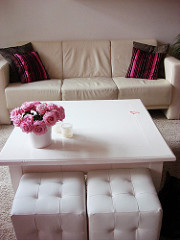

In [ ]:
#check out directory structure and view the classes/labels/folders
for item in data_dir.glob('*'):
  print(item.name)

daisys = list(data_dir.glob('daisy/*')) #go to a folder and get a list of images from that folder
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(daisys[10]))   #show an image (take the path of an image as string)
PIL.Image.open(str(roses[0]))

In [ ]:
#Load data from disk into Tensorflow Datasets (and split into training and test datasets)
train_ds = tf.keras.utils.image_dataset_from_directory(directory=data_dir,validation_split=0.2,subset='training', seed=123, image_size=(180,180), batch_size=32 )
test_ds = tf.keras.utils.image_dataset_from_directory(directory=data_dir, validation_split=0.2,subset='validation', seed=123,image_size=(180,180), batch_size=32)
class_names = train_ds.class_names    #Get the classes/lables
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


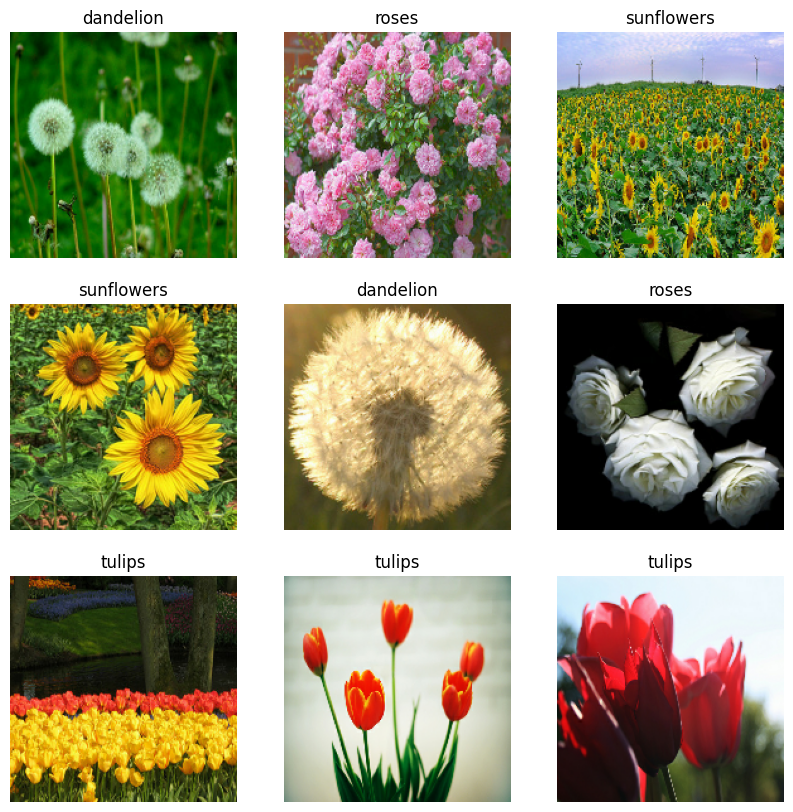

In [ ]:
#View some of the images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#View the Input shape of the data (that will be passed to our model)
for image_batch, label_batch in train_ds:
  print(image_batch.shape)
  print(label_batch.shape)
  break

#Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

(32, 180, 180, 3)
(32,)


In [ ]:
#Data Augmentation (create data aug layers and add it to the model)
data_augmentation = tf.keras.Sequential()
data_augmentation.add(tf.keras.layers.RandomFlip(mode='horizontal', input_shape=(180,180,3)))
data_augmentation.add(tf.keras.layers.RandomRotation(0.1))
data_augmentation.add(tf.keras.layers.RandomZoom(0.1))

In [ ]:
#Create a Conv2D model, using Sequential API
model = tf.keras.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Rescaling(1./255)) #Scale the data so that all pixel values are between 0 and 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(units=len(class_names)))  #output layer
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds, epochs=2)

#Evaluate and Plot the history
pd.DataFrame(history.history).plot()

Epoch 1/2
92/92 [==============================] - 129s 1s/step - loss: 1.4286 - accuracy: 0.4046 - val_loss: 1.2042 - val_accuracy: 0.5232
Epoch 2/2
92/92 [==============================] - 123s 1s/step - loss: 1.0701 - accuracy: 0.5725 - val_loss: 0.9961 - val_accuracy: 0.6117


In [ ]:
#Predict on new data
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"

#download the image file to disk
img_path = tf.keras.utils.get_file(origin=sunflower_url)
print(img_path)

#load the image from disk into a Python (PIL) Image object
img = tf.keras.utils.load_img(path=img_path,target_size=(180,180))

#turn the image object into array (of shape: 180,180,3)
img_array = tf.keras.utils.img_to_array(img)

#add a batch dimmension (so it has the same shape the model expects, i.e: x,180,180,3)
img_array = tf.expand_dims(img_array, axis=0)

#Pass the image to the model to predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

/root/.keras/datasets/592px-Red_sunflower.jpg
1/1 [==============================] - 0s 140ms/step
This image most likely belongs to tulips with a 85.51 percent confidence.


##NLP - Binary Classification (Input data as Files inside thier Class/Label Sub-Folders) - TensorFlow
https://www.tensorflow.org/tutorials

In [ ]:
##TENSOR FLOW: EXAMPLE 2: WORD EMBEDDINGS
import tensorflow as tf
import numpy as np
import pandas as pd
import pathlib
import os

#Get the file from web (and unzip it) into local disk
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
data_dir = tf.keras.utils.get_file(origin=url, extract=True) #downloads the file from url and renames it to flower_photos.tar
data_dir = pathlib.Path(data_dir).with_suffix('')   #path to the filename in pypthon Path object
print(f'data_dir {data_dir}')

84125825/84125825 [==============================] - 5s 0us/step
data_dir /root/.keras/datasets/aclImdb_v1.tar


In [ ]:
data_dir = '/root/.keras/datasets/aclImdb'
train_dir = '/root/.keras/datasets/aclImdb/train'   #MAKE sure extra sub-folders are deleted from train directory
test_dir = '/root/.keras/datasets/aclImdb/test'

#Load the files into Tensorflow Dataset from disk
train_ds = tf.keras.utils.text_dataset_from_directory(directory=train_dir, batch_size=1024, validation_split=0.2, seed=123, subset='training')
test_ds = tf.keras.utils.text_dataset_from_directory(directory=test_dir, batch_size=1024, validation_split=0.2, seed=123, subset='validation')
print(train_ds.class_names)

#View first few texts and thier labels
for text_batch, label_batch in train_ds.take(1):
    for i in range(3):
        print(f'{label_batch[i]} {text_batch[i]}')

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#Build a Text Vectorizer layer
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=10000,output_mode='int',output_sequence_length=10)

text_ds = train_ds.map(lambda x,y: x)   #only get the texts (not the labels/class) form the training dataaset
for text_batch in text_ds.take(1):
    for i in range(3):
        print(f'{text_batch[i]}')

vectorize_layer.adapt(text_ds)
#print(vectorize_layer('this is a test sentence test'))

#Build embedding layer
embed_layer = tf.keras.layers.Embedding(input_dim=10000, output_dim=16)
#print(embed_layer(vectorize_layer('this is a test sentence test')))

#Build a model (by first passing it text vectorization layer and embedding layer)
model = tf.keras.Sequential()
model.add(vectorize_layer)
model.add(embed_layer)
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_ds, validation_data=test_ds, epochs=2)

#Save the model
#path = 'Model10_nlp_1.keras' #.h5 or .keras
#model.save(filepath=path)

Found 100005 files belonging to 2 classes.
Using 80004 files for training.
Found 100005 files belonging to 2 classes.
Using 20001 files for validation.
b"TLJ's understated tour de force - of course Daniel Day-Lewis got the 2007 Oscar for showing the world what a great actor he is (and he is, don't get me wrong). <br /><br />On the other hand, Tommy Lee Jones doesn't show off his acting skills, he shows us a man, a troubled man, a, restrained, some would say uptight individual, a loving but maybe distant father, a remote and quite desperate husband, with all his prejudices and doubts. A performance not to be missed, it won't leave you untouched.<br /><br />It's a pity that this film probably won't be watched by the general public in the US - it's probably too devoid of outright action to appeal to moviegoers. Still, I feel it's one of the best and most thought provoking war films I've seen."
b"Reality TV hit a new low with this offensive crap of a show. Why anyone thought the Gotti fami

##Regression (Tensorflow Built in Dataset: Housing)

In [ ]:
#Import Housing data from Built-in TF Dataset
import tensorflow as tf
import pandas as pd

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)
X_train[0], y_train[0]

#Convert the ndarrays into DataFrame (since built in Scaling function can only be applied on DataFrame)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_train.head()

#Create columns transformer and scaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler() , [0,1,2,3,4,5,6,7,8,9,10,11,12])
)

#Fit (scaler) only on training Features
ct.fit(X_train)

#Transofrm/Scale both Training and Test Features
X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)

#Create a simple Dense model using Sequential api
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1)) #output layer
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=200, verbose=0)

#Evaluate and Plot the history
pd.DataFrame(history.history).plot()

#Save the model
model.save('mymodel1.h5')

##Image Classification: Images as Tensors - EfficientNet project

In [ ]:
# Note: As of May 2023, there have been some issues with TensorFlow versions 2.9-2.12
# with the following code.
# However, these seemed to have been fixed in version 2.13+.
# TensorFlow version 2.13 is available in tf-nightly as of May 2023 (will be default in Google Colab soon).
# Therefore, to prevent errors we'll install tf-nightly first.
# See more here: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/550

# Install tf-nightly (required until 2.13.0+ is the default in Google Colab)
!pip install -U -q tf-nightly

# Check TensorFlow version (should be minimum 2.4.0+ but 2.13.0+ is better)
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.9/566.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.3.2 which is incompatible.


ValueError: Name tf.RaggedTensorSpec has already been registered for class tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec.

In [ ]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds
# Get all available datasets in TFDS
datasets_list = tfds.list_builders()

# Set our target dataset and see if it exists
target_dataset = "food101"
print(f"'{target_dataset}' in TensorFlow Datasets: {target_dataset in datasets_list}")

'food101' in TensorFlow Datasets: True


In [ ]:
# Load in the data (as Tensors) from Tensorflow Datasets
(train_data, test_data), ds_info = tfds.load(name="food101", # target dataset to get from TFDS
                                             split=["train", "validation"], # what splits of data should we get? note: not all datasets have train, valid, test
                                             shuffle_files=True, # shuffle files on download?
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             with_info=True) # include dataset metadata? if so, tfds.load() returns

NameError: name 'tfds' is not defined

In [ ]:
# Get class names (and view first 10 of the classes/labels)
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# Take one sample off the training data < and check the shape>
train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)
# What does one sample of our training data look like?
train_one_sample
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 41
  Class name (str form): french_onion_soup
        


In [ ]:
# What are the min and max values?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)  #we will need to rescale the images to get between 0 and 1

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

In [ ]:
# Make a function for preprocessing images
# Convert uint8 data type to In float32 data type (because TF likes float)
# Images are comprised of differnet sized tensors. Hene need to convert them into the same size tensors (batches require all tensors have the same shape, e.g. (224, 224, 3)
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [ ]:
#JUST for Testing our preProcessing function, Preprocess a single sample image and check the outputs
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[168 148 123]
  [192 172 147]
  [200 180 155]
  ...
  [179 165 139]
  [188 172 147]
  [154 138 113]]

 [[184 164 139]
  [209 189 164]
  [212 192 167]
  ...
  [207 193 167]
  [218 202 177]
  [184 168 143]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[194.12755 174.12755 149.12755]
  [204.66325 184.66325 159.66325]
  [198.20918 180.42348 158.85204]
  ...
  [200.12253 186.55106 160.97958]
  [204.22949 190.22949 164.22949]
  [195.14168 179.14168 154.14168]]

 [[197.10204 177.10204 150.10204]
  [202.5102  185.5102  159.5102 ]
  [209.96428 193.83673 169.47958]
  ...
  [201.301   187.72952 162.15805]
  [207.8622  193.8622  167.8622 ]
  [197.218   183.218   157.218  ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


In [ ]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
# Turn on mixed precision training (OPTINOAL)
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

mixed_precision.global_policy() # should output "mixed_float16" (if your GPU is compatible with mixed precision)

<Policy "mixed_float16">

In [ ]:
#BUILD EFFICIENT_NET MODEL
from tensorflow.keras import layers

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = layers.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
#FIT THE MODEL

# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model (To save time per epoch, we'll also only validate on 15% of the test data)
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=2,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data))
                                                    )

Epoch 1/2
2368/2368 [==============================] - 212s 84ms/step - loss: 1.7188 - accuracy: 0.5816 - val_loss: 1.1284 - val_accuracy: 0.6973
Epoch 2/2
2368/2368 [==============================] - 188s 78ms/step - loss: 1.1989 - accuracy: 0.6898 - val_loss: 1.0228 - val_accuracy: 0.7206


In [ ]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 52s 66ms/step - loss: 1.0308 - accuracy: 0.7224


[1.0307562351226807, 0.7224158644676208]

##Image Classification (Input data as Files inside thier Class/Label Sub-Folders) - Kaggle (Birds)
https://www.kaggle.com/datasets/gpiosenka/100-bird-species?resource=download&select=birds.csv

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import zipfile

In [ ]:
#Prereq: First manually upload the file from local drive into colab session strorage
#Then use command below to unzip
!unzip '/content/birds.zip'
%ls

#zip_ref = zipfile.ZipFile("/content/birds.zip", "r")
#zip_ref.extractall()
#zip_ref.close()

BadZipFile: File is not a zip file

In [ ]:
#Load files from path into tensorflow datasets

#path of local drive (or colab storage) where data has been downloaded and unzipped
train_dir = 'C:\\Users\\EH839XW\\Downloads\\birds\\train'
test_dir = 'C:\\Users\\EH839XW\\Downloads\\birds\\test'

train_ds = tf.keras.utils.image_dataset_from_directory(directory=train_dir,validation_split=0.2, subset='training', seed=123, batch_size=32, image_size=(256,256))
test_ds = tf.keras.utils.image_dataset_from_directory(directory=test_dir, validation_split=0.2, subset='validation', seed=123, batch_size=32, image_size=(256, 256))
class_names = train_ds.class_names
print(class_names)

# Take one sample off the training data < and check the shape>
train_one_sample = train_ds.take(1) # samples are in format (image_tensor, label)
# What does one sample of our training data look like?
print(train_one_sample)
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
        """)
# What are the min and max values?
print(tf.reduce_max(image))  #we will need to rescale the images to get between 0 and 1

NameError: name 'tf' is not defined

In [ ]:
# Make a function for preprocessing images
# Convert uint8 data type to In float32 data type (because TF likes float)
# Images are comprised of differnet sized tensors. Hene need to convert them into the same size tensors (batches require all tensors have the same shape, e.g. (224, 224, 3)
def preprocess_img(image, label, img_shape=256):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

#JUST for Testing our preProcessing function, Preprocess a single sample image and check the outputs
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

# Map preprocessing function to training data (and paralellize)
train_ds = train_ds.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
#train_ds = train_ds.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_ds = test_ds.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
#test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)
print(test_ds)

In [ ]:
#BUILD EFFICIENT_NET MODEL
from tensorflow.keras import layers

# Create base model
input_shape = (256, 256, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = layers.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#FIT THE MODEL
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model (To save time per epoch, we'll also only validate on 15% of the test data)
history = model.fit(train_ds,
                                                     epochs=2,
                                                     steps_per_epoch=len(train_ds),
                                                     validation_data=test_ds,
                                                     validation_steps=int(0.15 * len(test_ds))
                                                    )

NotFoundError: Could not find directory C:/Users/EH839XW/Downloads/birds/train

##NLP: Multi-Label Class-Convert Labels from Text into Int (categories)- [MULTIPLE MODLES]
https://www.kaggle.com/datasets/elvinrustam/grocery-dataset/data

In [ ]:
#Read from csv file and create combined features columns by concateating String columns
import pandas as pd
import numpy as np

df = pd.read_csv('GroceryDataset.csv')
df['feature_combined'] = df['Title'] + ' ' + df['Feature'] + ' ' + df['Product Description']
df['feature_combined'] = df['feature_combined'].astype(str)
df['feature_combined'].iloc[0]

'David’s Cookies Mile High Peanut Butter Cake, 6.8 lbs (14 Servings) "10"" Peanut Butter Cake\nCertified Kosher OU-D\n14 Servings A cake the dessert epicure will die for!Our Top Selling Cake! Fudge brownie base, layered in velvety smooth peanut butter mousse, rich chocolate cake, topped with brownie chunks, handful of peanut butter chips, drizzled in fudge. This cake is the thoughtful gift idea that’s perfect for family, friends, coworkers, or to anyone you care about in your life. -\tGenerously sized precut slices, a cake lover’s dreams come true! Includes:Measures 10” diameterWeighs in at 6.8 lbs.14 servings OU-D certified, the most trusted kosher certification in the U.S.All natural with no added preservativesSome of our products may contain nuts. Our facility is NOT a nut-free facility, and as a result it is possible that any product may have come in contact with nut or nut oils'

In [ ]:
#Break into features (X) and labels (y)
X = df['feature_combined'].to_numpy()

#Convert Labels (y) from string to integer categories
df['Sub Category1'] = pd.Categorical(df['Sub Category'])
df['Sub Category1'] = df['Sub Category1'].cat.codes
y = df['Sub Category1'].to_numpy()

#find the number of classes/labels
num_classes = len(np.unique(y))
print(num_classes)

array([ 0,  0,  0, ..., 18, 18, 18], dtype=int8)

19

In [ ]:
#Split train test X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)
X_train[0], y_train[0]

('Bisquick, Pancake & Baking Mix, 96 oz Pancake and Baking Mix   0g Trans Fat per Serving   Kosher Dairy   No Artificial Flavors   96 oz Box All Purpose\nMakes About 155 Pancakes Per Box',
 2)

In [ ]:
#Create Text Vectorization layer
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import random

max_vocab_length = 10000
max_length = round(sum([len(i.split()) for i in X_train])/len(X_train))
print(max_length)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

text_vectorizer.adapt(X_train)

#JUST TO TEST: Get a random sentence and tokenize it
sample_sentence = random.choice(X_train)
print(sample_sentence)
print(text_vectorizer([sample_sentence]))

125
Godiva Dark Chocolate Ganache Hearts 14.8 oz 4-pack Dark Chocolate ganache filling covered by a Dark Chocolate Shell
14.8 oz per bag, 4-pack GODIVA Masterpieces – GODIVA’s most exquisite chocolates now available in delightful individually wrapped mini chocolates, perfect to enjoy anytime.   GODIVA’s Dark Chocolate Ganache Heart is inspired by GODIVA’s most beloved chocolate; the heart-shaped ‘coeur iconique’. A bold dark chocolate Heart with a luxurious, velvety chocolate ganache filling.   Includes:   Godiva Dark Chocolate Ganache Hearts
14.8 oz per bag, 4-Pack
tf.Tensor(
[[ 776   83   16  694 1207 3457    8 1666   83   16  694  575  373   70
     6   83   16  615 3457    8   34   96 1666  776 2481  125 4255  234
  1211 1001  817  129    7 1646  114  220  412 1001   53    5  111 1504
  4255   83   16  694  436   12 1309   70 4255  234 2790   16    3 4238
  7690 9764    6  711   83   16  436    9    6 1900 1189   16  694  575
   113  776   83   16  694 1207 3457    8   34   96 1666

In [ ]:
#Build an Embedding layer
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name='embedding_1')

#JUST TO TEST: Get a random tokenzied sentence and embed it
print(embedding(text_vectorizer(sample_sentence)))

tf.Tensor(
[[ 0.01238174 -0.02736895 -0.02813706 ... -0.00170801 -0.03181588
  -0.03319784]
 [ 0.00490882 -0.00914029 -0.01262227 ... -0.03078954 -0.0337706
  -0.04379101]
 [ 0.00203383 -0.02338337  0.00575821 ... -0.02712601 -0.01130872
   0.04692484]
 ...
 [-0.03774796  0.01728297  0.00418351 ...  0.02564986 -0.0073876
  -0.02249928]
 [-0.03774796  0.01728297  0.00418351 ...  0.02564986 -0.0073876
  -0.02249928]
 [-0.03774796  0.01728297  0.00418351 ...  0.02564986 -0.0073876
  -0.02249928]], shape=(125, 128), dtype=float32)


In [ ]:
#1. DENSE MODEL
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1 dimensional
x = text_vectorizer(inputs)
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs = layers.Dense(num_classes, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

model_1.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

model_1_history = model_1.fit(X_train,
                              y_train,
                              epochs=2,
                              validation_data =(X_test, y_test))

Epoch 1/2
44/44 [==============================] - 6s 117ms/step - loss: 2.8668 - accuracy: 0.3039 - val_loss: 2.7901 - val_accuracy: 0.2699
Epoch 2/2
44/44 [==============================] - 4s 85ms/step - loss: 2.6558 - accuracy: 0.3466 - val_loss: 2.5931 - val_accuracy: 0.2642


In [ ]:
# 2. LSTM MODEL

# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(num_classes, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

# Compile model
model_2.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2_history = model_2.fit(X_train,
                              y_train,
                              epochs=2,
                              validation_data=(X_test, y_test))

(None, 125, 128)
(None, 64)
Epoch 1/2
44/44 [==============================] - 9s 123ms/step - loss: 2.6843 - accuracy: 0.1929 - val_loss: 2.5746 - val_accuracy: 0.1903
Epoch 2/2
44/44 [==============================] - 5s 102ms/step - loss: 2.4587 - accuracy: 0.2149 - val_loss: 2.4108 - val_accuracy: 0.2472


In [ ]:
#3. GRU MODEL
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_3')

# build on RNN using GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

model_3_history = model_3.fit(X_train,
                              y_train,
                              epochs=2,
                              validation_data=(X_test, y_test))

Epoch 1/2
44/44 [==============================] - 9s 134ms/step - loss: 2.7428 - accuracy: 0.1751 - val_loss: 2.6640 - val_accuracy: 0.2102
Epoch 2/2
44/44 [==============================] - 5s 113ms/step - loss: 2.4728 - accuracy: 0.2584 - val_loss: 2.3858 - val_accuracy: 0.2330


In [ ]:
#4. BIDIRECTIONAL RNN

# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(num_classes, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

model_4_history = model_4.fit(X_train,
                              y_train,
                              epochs=2,
                              validation_data=(X_test, y_test))

In [ ]:
#5. CNN FOR TEXT

tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

model_5_history = model_5.fit(X_train,
                              y_train,
                              epochs=2,
                              validation_data=(X_test, y_test))

Epoch 1/2
44/44 [==============================] - 10s 142ms/step - loss: 2.7993 - accuracy: 0.2036 - val_loss: 2.6010 - val_accuracy: 0.2784
Epoch 2/2
44/44 [==============================] - 4s 92ms/step - loss: 2.2934 - accuracy: 0.3872 - val_loss: 2.1972 - val_accuracy: 0.3324


In [ ]:
# TF Hub Pretrained Sentence Encoder
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
], name="model_6_USE")

model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])
model_6_history = model_6.fit(X_train,
                              y_train,
                              epochs=2,
                              validation_data=(X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/2
44/44 [==============================] - 7s 43ms/step - loss: 2.7072 - accuracy: 0.3011 - val_loss: 2.4696 - val_accuracy: 0.3011
Epoch 2/2
44/44 [==============================] - 1s 30ms/step - loss: 2.1761 - accuracy: 0.3979 - val_loss: 2.0161 - val_accuracy: 0.4574


In [ ]:
model_6.evaluate(X_test, y_test)

11/11 [==============================] - 0s 24ms/step - loss: 2.0161 - accuracy: 0.4574


[2.01613187789917, 0.4573863744735718]

In [ ]:
model_6_pred_probs = model_6.predict(X_test)
model_6_preds = model_6_pred_probs.argmax(axis=1)
model_6_preds

11/11 [==============================] - 1s 40ms/step


array([18, 12, 12, 18, 18, 12,  9,  3, 14, 18,  1, 18,  4,  1,  4,  3,  4,
       12, 12, 18, 18,  5, 18,  3, 18, 14, 18, 12, 18, 18, 18, 12, 18, 18,
       12, 12, 12,  1, 18, 18, 12,  1, 18, 18, 12, 18, 12, 12, 18, 18, 18,
       12,  9, 18, 18, 12, 18, 18, 14,  5,  3,  3,  7,  5, 18,  3,  5, 18,
       18, 12,  7, 18, 12,  4,  7,  1, 12, 18, 18,  4, 18, 12, 18,  5, 18,
       18, 18, 18,  1, 12, 18,  1, 18, 18,  4, 18, 18,  4,  7,  9, 12,  4,
        7,  1,  7, 18, 12,  7, 12,  7, 14, 18, 18,  4,  5, 12,  3, 14, 18,
        3, 12,  7, 18,  1, 18, 18, 18,  5, 18, 12, 18, 14,  4,  9, 18, 18,
        1,  3, 18,  1,  1, 12, 18, 18,  4,  9,  4, 18, 18,  7, 18,  1, 18,
       12, 12,  7, 18, 12, 12, 18, 18, 12, 18, 14,  9, 18,  4, 12, 18, 18,
        1, 14,  1, 18,  3, 18,  5, 12, 18, 18, 12, 12, 18,  4, 12, 18, 18,
       18, 12,  9, 18,  1, 10, 14, 18, 12, 12,  1, 18, 18, 18,  4, 18,  7,
       18, 18,  1,  7,  9, 18, 18,  5, 12,  4, 12, 18,  7, 18, 10, 18, 18,
       14, 12, 12, 12,  9

##NLP [Load Data - Stackoverflow] Input data as Files inside thier Class/Label Sub-Folders
https://www.tensorflow.org/tutorials/load_data/text

In [ ]:
#import data from web
from tensorflow.keras.utils import get_file
import pathlib

data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = get_file(
    origin=data_url,
    untar=True,
    cache_dir='stack_overflow',
    cache_subdir='')

dataset_dir = pathlib.Path(dataset_dir).parent
print(dataset_dir)

In [ ]:
train_dir = '/tmp/.keras/train'
test_dir = '/tmp/.keras/test'

In [ ]:
#Load data into TF Datasets from local file path
import tensorflow as tf
raw_train_ds = tf.keras.utils.text_dataset_from_directory(train_dir, batch_size=32, validation_split=0.2, subset='training', seed=42)
raw_val_ds = tf.keras.utils.text_dataset_from_directory(train_dir, batch_size=32, validation_split=0.2, subset='validation', seed=42)
raw_test_ds = tf.keras.utils.text_dataset_from_directory(test_dir, batch_size=32)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.
Found 8000 files belonging to 4 classes.


In [ ]:
#View the data (not needed)
for text, label in raw_train_ds.take(1):
  for i in range(1):
    print(label.numpy()[i])
    print(text.numpy()[i])

class_names = raw_train_ds.class_names
num_classes = len(class_names)
print(num_classes)
print(class_names)

1
b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second constructor and use it in that class. but it only uses the default constructor,

In [ ]:
#This is to improve performance
raw_train_ds = raw_train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
raw_val_ds = raw_val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
raw_test_ds = raw_test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#Build a Text Vectorizer layer
VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 250
int_vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH)

# Make a text-only dataset (without labels), then call `TextVectorization.adapt`.
train_text = raw_train_ds.map(lambda text, labels: text)
for text_batch in train_text.take(1):
    for i in range(3):
        print(f'{text_batch[i]}')

int_vectorize_layer.adapt(train_text)

#ONLY to test Text Vectorizer layer
# Retrieve a batch (of 32 reviews and labels) from the dataset.
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch[0], label_batch[0]
print("Question:", first_question)
print("Label:", first_label)

Question: tf.Tensor(b'"unit testing of setters and getters teacher wanted us to do a comprehensive unit test. for me, this will be the first time that i use junit. i am confused about testing set and get methods. do you think should i test them? if the answer is yes; is this code enough for testing?..  public void testsetandget(){.    int a = 10;.    class firstclass = new class();.    firstclass.setvalue(10);.    int value = firstclass.getvalue();.    assert.asserttrue(""error"", value==a);.  }...in my code, i think if there is an error, we can\'t know that the error is deriving because of setter or getter."\n', shape=(), dtype=string)
Label: tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
#Build 1D ConvNet Sequential Model (including Embedding Layer)
def create_model(vocab_size, num_labels, vectorizer=None):
  my_layers =[]
  if vectorizer is not None:
    my_layers = [vectorizer]

  my_layers.extend([
      tf.keras.layers.Embedding(vocab_size, 64, mask_zero=True),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2),
      tf.keras.layers.GlobalMaxPooling1D(),
      tf.keras.layers.Dense(num_classes)    #Output layer
  ])

  model = tf.keras.Sequential(my_layers)
  return model

# `vocab_size` is `VOCAB_SIZE + 1` since `0` is used additionally for padding.
int_model = create_model(vocab_size=VOCAB_SIZE + 1, num_labels=num_classes, vectorizer=int_vectorize_layer)


In [ ]:
#Run the model
int_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])
int_history = int_model.fit(raw_train_ds, validation_data=raw_val_ds, epochs=10)

Epoch 1/10
200/200 [==============================] - 31s 134ms/step - loss: 1.2829 - accuracy: 0.4031 - val_loss: 0.9867 - val_accuracy: 0.6194
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.8119 - accuracy: 0.6628 - val_loss: 0.6523 - val_accuracy: 0.7500
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.5871 - accuracy: 0.7744 - val_loss: 0.5388 - val_accuracy: 0.7987
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4286 - accuracy: 0.8525 - val_loss: 0.4811 - val_accuracy: 0.8213
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 0.3096 - accuracy: 0.9067 - val_loss: 0.4702 - val_accuracy: 0.8200
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.2215 - accuracy: 0.9378 - val_loss: 0.4806 - val_accuracy: 0.8119
Epoch 7/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1610 - accuracy: 0.9550 - val_loss: 0.5030 - val_accuracy: 0.8163
Epo

##Time Series (Single Variate), Time step (DateTime) - (TFDS: Weather)
https://www.tensorflow.org/tutorials/structured_data/time_series

In [ ]:
#Imports
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
#Download data into CSV file
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
print(csv_path)

/root/.keras/datasets/jena_climate_2009_2016.csv


In [ ]:
#Read from csv and set Date Time column as the Index of the DataFrame
df = pd.read_csv(csv_path)
df['Date Time'] = pd.to_datetime(df['Date Time'])
df = df.set_index('Date Time')
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
#Break into X (timesteps: Date Time) and y (Temperature: Degrees)
X = df.index.to_numpy()
y = df['T (degC)'].to_numpy()
X

array(['2009-01-01T00:10:00.000000000', '2009-01-01T00:20:00.000000000',
       '2009-01-01T00:30:00.000000000', ...,
       '2016-12-31T23:40:00.000000000', '2016-12-31T23:50:00.000000000',
       '2017-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
#MAKE WINDOWS
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

# Create function to view NumPy arrays as windows
import numpy as np
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
#Create the Full Windows and Full Labels
full_windows, full_labels = make_windows(y, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

# View the first 3 windows/labels (just to visualize)
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

# View the last 3 windows/labels (just to visualize)
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [-8.02 -8.41 -8.51 -8.31 -8.27 -8.05 -7.62] -> Label: [-7.62]
Window: [-8.41 -8.51 -8.31 -8.27 -8.05 -7.62 -7.62] -> Label: [-7.91]
Window: [-8.51 -8.31 -8.27 -8.05 -7.62 -7.62 -7.91] -> Label: [-8.43]
Window: [-4.08 -4.45 -4.09 -3.76 -3.93 -4.05 -3.35] -> Label: [-3.16]
Window: [-4.45 -4.09 -3.76 -3.93 -4.05 -3.35 -3.16] -> Label: [-4.23]
Window: [-4.09 -3.76 -3.93 -4.05 -3.35 -3.16 -4.23] -> Label: [-4.82]


In [ ]:
#Split into training and test datasets (Note: do NOT use the TrainTestSplit method)
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
print(f'train_windows:{len(train_windows)} test_windows:{len(test_windows)} train_labels:{len(train_labels)} len(test_labels):{len(test_labels)}')

#view the first 5 trianing windows and labels
print(train_windows[:5])
print(train_labels[:5])

train_windows:336435 test_windows:84109 train_labels:336435 len(test_labels):84109
[[-8.02 -8.41 -8.51 -8.31 -8.27 -8.05 -7.62]
 [-8.41 -8.51 -8.31 -8.27 -8.05 -7.62 -7.62]
 [-8.51 -8.31 -8.27 -8.05 -7.62 -7.62 -7.91]
 [-8.31 -8.27 -8.05 -7.62 -7.62 -7.91 -8.43]
 [-8.27 -8.05 -7.62 -7.62 -7.91 -8.43 -8.76]]
[[-7.62]
 [-7.91]
 [-8.43]
 [-8.76]
 [-8.88]]


In [ ]:
#Build a simple Dense model using Seqential API
import tensorflow as tf
model15 = tf.keras.Sequential()
model15.add(tf.keras.layers.Dense(units=128, activation='relu'))
model15.add(tf.keras.layers.Dense(units=HORIZON)) # No activation defaults to linear activation
model15.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])
history15 = model15.fit(x=train_windows, y=train_labels, epochs=2, validation_data=(test_windows, test_labels))

Epoch 1/2
10514/10514 [==============================] - 24s 2ms/step - loss: 0.1903 - mae: 0.1903 - val_loss: 0.1437 - val_mae: 0.1437
Epoch 2/2
10514/10514 [==============================] - 24s 2ms/step - loss: 0.1536 - mae: 0.1536 - val_loss: 0.1904 - val_mae: 0.1904


##Time Series (Multi Variate), Time step (DateTime) - (TFDS: Weather)


In [ ]:
#Imports
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
#Download data into CSV file
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
print(csv_path)

13568290/13568290 [==============================] - 0s 0us/step
/root/.keras/datasets/jena_climate_2009_2016.csv


In [ ]:
#Read from csv and set the DateTime column as the Index of the DataFrame
df1 = pd.read_csv(csv_path,parse_dates=['Date Time'], index_col=['Date Time'])
df1.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
#Remove all other columns from the dataFrame. Include only Temperature, Presure and Tpot columns
df = df1[['T (degC)', 'p (mbar)', 'Tpot (K)']]
df.head()

,T (degC),p (mbar),Tpot (K)
Date Time,,,
2009-01-01 00:10:00,-8.02,996.52,265.40
2009-01-01 00:20:00,-8.41,996.57,265.01
2009-01-01 00:30:00,-8.51,996.53,264.91
2009-01-01 00:40:00,-8.31,996.51,265.12
2009-01-01 00:50:00,-8.27,996.51,265.15


In [ ]:
# prompt: use df column Date Time to convert into yearly data in a new column

df['Year'] = df.index.year


In [ ]:
df.head()

,T (degC),p (mbar),Tpot (K),Year
Date Time,,,,
2009-01-01 00:10:00,-8.02,996.52,265.40,2009
2009-01-01 00:20:00,-8.41,996.57,265.01,2009
2009-01-01 00:30:00,-8.51,996.53,264.91,2009
2009-01-01 00:40:00,-8.31,996.51,265.12,2009
2009-01-01 00:50:00,-8.27,996.51,265.15,2009


In [ ]:
# prompt: use df['Year'] to create an average value of T (degC)

df_mean_temp_by_year = df.groupby('Year')['T (degC)'].mean()
print(df_mean_temp_by_year)


Year
2009     8.830284
2010     7.504652
2011     9.303914
2012     9.655535
2013     9.093978
2014    10.718917
2015    10.511207
2016     9.988671
2017    -4.820000
Name: T (degC), dtype: float64


In [ ]:
#Create Windowed datasets of the multivariate features (7 days of temperatures[7 columns], and 1 column for pressure)

# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

# Make a copy of the DataFrame
df_temperature_windowed = df.copy()

# Add windowed columns (by shifting columns)
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
  df_temperature_windowed[f'T (degC)+{i+1}'] = df_temperature_windowed['T (degC)'].shift(periods=i+1)

#Create X (7 day Temperatures and 1 Pressure and 1Tpot columns) and y(Temperature, for 8th day)
X = df_temperature_windowed.dropna().drop("T (degC)", axis=1).astype(np.float32)
y = df_temperature_windowed.dropna()["T (degC)"].astype(np.float32)
X

,p (mbar),Tpot (K),T (degC)+1,T (degC)+2,T (degC)+3,T (degC)+4,T (degC)+5,T (degC)+6,T (degC)+7
Date Time,,,,,,,,,
2009-01-01 01:20:00,996.500000,265.809998,-7.62,-8.05,-8.27,-8.31,-8.51,-8.41,-8.02
2009-01-01 01:30:00,996.500000,265.519989,-7.62,-7.62,-8.05,-8.27,-8.31,-8.51,-8.41
2009-01-01 01:40:00,996.530029,264.989990,-7.91,-7.62,-7.62,-8.05,-8.27,-8.31,-8.51
2009-01-01 01:50:00,996.619995,264.660004,-8.43,-7.91,-7.62,-7.62,-8.05,-8.27,-8.31
2009-01-01 02:00:00,996.619995,264.540009,-8.76,-8.43,-7.91,-7.62,-7.62,-8.05,-8.27
...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.070007,269.100006,-3.93,-3.76,-4.09,-4.45,-4.08,-3.22,-2.89
2016-12-31 23:30:00,999.929993,269.809998,-4.05,-3.93,-3.76,-4.09,-4.45,-4.08,-3.22
2016-12-31 23:40:00,999.820007,270.010010,-3.35,-4.05,-3.93,-3.76,-4.09,-4.45,-4.08


In [ ]:
y

Date Time
2009-01-01 01:20:00   -7.62
2009-01-01 01:30:00   -7.91
2009-01-01 01:40:00   -8.43
2009-01-01 01:50:00   -8.76
2009-01-01 02:00:00   -8.88
                       ... 
2016-12-31 23:20:00   -4.05
2016-12-31 23:30:00   -3.35
2016-12-31 23:40:00   -3.16
2016-12-31 23:50:00   -4.23
2017-01-01 00:00:00   -4.82
Name: T (degC), Length: 420544, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(336435, 336435, 84109, 84109)

In [ ]:
X_train.columns

Index(['p (mbar)', 'Tpot (K)', 'T (degC)+1', 'T (degC)+2', 'T (degC)+3',
       'T (degC)+4', 'T (degC)+5', 'T (degC)+6', 'T (degC)+7'],
      dtype='object')

In [ ]:
#Scale the Data (Note: column transformers works on DataFrame)

#Create columns transformer and scaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
ct = make_column_transformer(
    (MinMaxScaler() , ['p (mbar)', 'Tpot (K)', 'T (degC)+1', 'T (degC)+2', 'T (degC)+3',
       'T (degC)+4', 'T (degC)+5', 'T (degC)+6', 'T (degC)+7'])
)

#Fit Column Transformer on TRAINING features only (doing on Test features will result in data leakage)
ct.fit(X_train)

#Transform both training features and test features with Scalling
X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)
X_train_scaled

array([[0.82619095, 0.2549019 , 0.26142347, ..., 0.2463054 , 0.24800408,
        0.25462884],
       [0.82619095, 0.25004148, 0.26142347, ..., 0.24970272, 0.2463054 ,
        0.24800408],
       [0.8264904 , 0.24115944, 0.25649738, ..., 0.25038218, 0.24970272,
        0.2463054 ],
       ...,
       [0.76111126, 0.68660975, 0.6920333 , ..., 0.69950736, 0.70205534,
        0.70511293],
       [0.76101303, 0.6847658 , 0.68931544, ..., 0.6991676 , 0.69950736,
        0.70205534],
       [0.7601156 , 0.6832576 , 0.6874469 , ..., 0.697469  , 0.6991676 ,
        0.69950736]], dtype=float32)

In [ ]:
#Build Dense Model (multivariate)
import tensorflow as tf
model19 = tf.keras.Sequential()
model19.add(tf.keras.layers.Dense(units=128, activation='relu'))
model19.add(tf.keras.layers.Dense(units=128, activation='relu'))
model19.add(tf.keras.layers.Dense(units=HORIZON))
model19.compile(optimizer='adam', loss='mae')
model19.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=2)

Epoch 1/2
10514/10514 [==============================] - 27s 3ms/step - loss: 0.3204 - val_loss: 0.1283
Epoch 2/2
10514/10514 [==============================] - 25s 2ms/step - loss: 0.1165 - val_loss: 0.0690


## Generate Shakespearean Text (using RNN)

In [ ]:
#Import Data from a text file on the web
import tensorflow as tf
shakespeare_url = "https://homl.info/shakespeare" # url shortcut
filepath = tf.keras.utils.get_file('shakespeare.txt',shakespeare_url)
print(filepath) #print local file path

with open(filepath) as f:
    shakespeare_text = f.read()
print(shakespeare_text[:80])  #print first few lines

/root/.keras/datasets/shakespeare.txt
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.


In [ ]:
#create text vectorizer layer
text_vec_layer = tf.keras.layers.TextVectorization(split='character', standardize='lower')
text_vec_layer.adapt([shakespeare_text])

encoded = text_vec_layer([shakespeare_text])[0] # print encoded first line (just to test)
print(encoded)

encoded -= 2 # drop first 2 tokens 0 (for padding) and 1 (for unknown), which we will not use
n_tokens = text_vec_layer.vocabulary_size() - 2 # number of disctinct characters
dataset_size = len(encoded) # total number of chars
print(n_tokens)
print(dataset_size)

tf.Tensor([21  7 10 ... 22 28 12], shape=(1115394,), dtype=int64)
39
1115394


In [ ]:
# turn long sequence into a window that we can then use to train a seq-to-seq RNN. The targets will be similar to the inputs, but shifted by one time step into the "future".
# for example the text "to be or not to b"(without final e), and the corresponding target "e". Let's write a small utility function
def to_dataset(sequence, length, shuffle=False, seed=None, batch_size=32):
  ds = tf.data.Dataset.from_tensor_slices(sequence)
  ds = ds.window(length + 1, shift = 1, drop_remainder=True)
  ds = ds.flat_map(lambda window_ds: window_ds.batch(length+1))
  if shuffle:
    ds = ds.shuffle(buffer_size=100_000, seed=seed)
  ds = ds.batch(batch_size)
  return ds.map(lambda window: (window[:, :-1], window[:, 1:])).prefetch(1)

In [ ]:
# now we're ready to create training set, validation set and test set. 90% for training, 5% validation and 5% testing
length = 100
tf.random.set_seed(42)
train_set = to_dataset(encoded[:1_000_000], length=length, shuffle=True,
                       seed=42)
valid_set = to_dataset(encoded[1_000_000: 1_060_000], length=length)
test_set = to_dataset(encoded[1_060_000:], length=length)

In [ ]:
#IMPORTANT!!!
#This training code takes 1-2 hours depending on GPU etc. If you dont want to train the model you can just skip the next cell and continue on to next cell to use a pretrained model

# build and train a Char-RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=n_tokens, output_dim=16),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dense(n_tokens, activation="softmax")
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])
model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    "my_shakespeare_model", monitor='val_accuracy', save_best_only=True
)

history = model.fit(train_set, validation_data=valid_set, epochs=1, callbacks=[model_ckpt])

   2751/Unknown - 325s 105ms/step - loss: 1.8311 - accuracy: 0.4595

KeyboardInterrupt: 

In [ ]:
shakepeare_model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Lambda(lambda X: X-2), # to skip <PAD> or <UNK> token
    model
])

In [ ]:
from pathlib import Path

url = "https://github.com/ageron/data/raw/main/shakespeare_model.tgz"
path = tf.keras.utils.get_file("shakespeare_model.tgz", url, extract=True)
model_path = Path(path).with_name("shakespeare_model")
# uncomment the line below to use the downloaded model
shakespeare_model = tf.keras.models.load_model(model_path)

352865/352865 [==============================] - 0s 0us/step


In [ ]:
y_proba = shakepeare_model.predict(["To be or not to b"])[0, -1]
y_pred = tf.argmax(y_proba) # select the most probable character ID
text_vec_layer.get_vocabulary()[y_pred+2]

1/1 [==============================] - 0s 36ms/step


'e'